# CAPSTONE PROJECT - GROUP 2 - DEMOGRAPHIC INFORMATION

### Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings("ignore")

### Import Datasets

In [72]:
### USER'S DATAFRAME ###
df1 = pd.read_csv("./datasets/users/not_china_users.csv")
df2 = pd.read_csv("./datasets/users/china_users.csv")

users = pd.concat([df1, df2])
#print(users.head(3))

### PRODUCTS-USER'S DATAFRAME ###

df1 = pd.read_csv("./datasets/products/user_order_item_prd-1--24999.csv")
df2 = pd.read_csv("./datasets/products/user_order_item_prd-25000--49999.csv")
df3 = pd.read_csv("./datasets/products/user_order_item_prd-50000--74999.csv")
df4 = pd.read_csv("./datasets/products/user_order_item_prd-75000--100000.csv")

products_users = pd.concat([df1, df2, df3, df4])
#print(products_users.head(3))

### ORDERS-USER'S DATAFRAME ###

df1 = pd.read_csv("./datasets/orders/orders_1--74999.csv")
df2 = pd.read_csv("./datasets/orders/orders_75000+.csv")

orders_users = pd.concat([df1, df2])
#print(orders_users.head(3))

### EVENTS-USER'S DATAFRAME ###

df1 = pd.read_csv("./datasets/events/events_1--4999.csv")
df2 = pd.read_csv("./datasets/events/events_5000--9999.csv")
df3 = pd.read_csv("./datasets/events/events_10000--14999.csv")
df4 = pd.read_csv("./datasets/events/events_15000--19999.csv")
df5 = pd.read_csv("./datasets/events/events_20000--24999.csv")
df6 = pd.read_csv("./datasets/events/events_25000--29999.csv")
df7 = pd.read_csv("./datasets/events/events_30000--34999.csv")
df8 = pd.read_csv("./datasets/events/events_35000--39999.csv")
df9 = pd.read_csv("./datasets/events/events_40000--44999.csv")
df10 = pd.read_csv("./datasets/events/events_45000--49999.csv")
df11 = pd.read_csv("./datasets/events/events_50000--54999.csv")
df12 = pd.read_csv("./datasets/events/events_55000--59999.csv")
df13 = pd.read_csv("./datasets/events/events_60000--64999.csv")
df14 = pd.read_csv("./datasets/events/events_65000--69999.csv")
df15 = pd.read_csv("./datasets/events/events_70000--74999.csv")
df16 = pd.read_csv("./datasets/events/events_75000--79999.csv")
df17 = pd.read_csv("./datasets/events/events_80000--84999.csv")
df18 = pd.read_csv("./datasets/events/events_85000--89999.csv")
df19 = pd.read_csv("./datasets/events/events_90000--94999.csv")
df20 = pd.read_csv("./datasets/events/events_95000--100000.csv")

events = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20])

### EVENTS-USER'S DATAFRAME ###

df1 = pd.read_csv("./datasets/events/events_user-null_1298099--1418098.csv")
df2 = pd.read_csv("./datasets/events/events_user-null_1418099--1538098.csv")
df3 = pd.read_csv("./datasets/events/events_user-null_1538099--1658098.csv")
df4 = pd.read_csv("./datasets/events/events_user-null_1658099--1778098.csv")
df5 = pd.read_csv("./datasets/events/events_user-null_1778099--1898098.csv")
df6 = pd.read_csv("./datasets/events/events_user-null_1898099--2018098.csv")
df7 = pd.read_csv("./datasets/events/events_user-null_2018099--2138098.csv")
df8 = pd.read_csv("./datasets/events/events_user-null_2138099--2258098.csv")
df9 = pd.read_csv("./datasets/events/events_user-null_2258099--2378098.csv")
df10 = pd.read_csv("./datasets/events/events_user-null_2378099--2498098.csv")

events_null_users = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

conditions = [users["age"]<20, ((users["age"]>=20) & (users["age"]<=29)) , ((users["age"]>29) & (users["age"]<=39)), ((users["age"]>39) & (users["age"]<=49)) , ((users["age"]>49) & (users["age"]<=59)), users["age"]>59 ]
age_group = ["1-Teens", "2-Twenties", "3-Thirties", "4-Forties", "5-Fifties", "6-Elders"]

users["age_group"] = np.select(conditions, age_group)
users["created_at"] = pd.to_datetime(users["created_at"])
users["created_at"] = pd.to_datetime(users["created_at"].dt.strftime('%m/%d/%Y'))
users["costumer_time"] = ((pd.to_datetime('today').normalize()- users["created_at"])/(24*3600*1000000000)).astype('int64')

#print(users)

# 1. What is the distribution of age and gender among our customer base?

         state    user_id
4   California  16.369684
43       Texas  11.071513
9      Florida   6.937515
         state    user_id
4   California  16.215301
43       Texas  11.848341
9      Florida   8.158429
        state    user_id
6   Guangdong  15.768808
25   Shanghai   7.177635
31   Zhejiang   6.093922
        state    user_id
6   Guangdong  15.244571
25   Shanghai   7.084887
2     Beijing   6.865541
           state    user_id
25     São Paulo  14.211503
4          Bahia  10.352505
12  Minas Gerais   9.684601
           state    user_id
25     São Paulo  15.132924
12  Minas Gerais  11.145194
4          Bahia  10.378323


Text(0.5, 1.0, 'Distribution in Brasil - Youth')

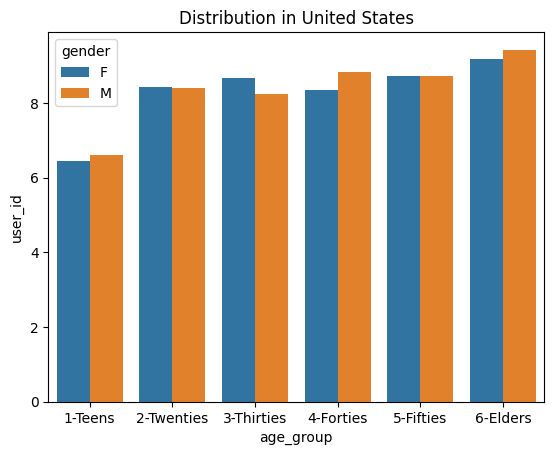

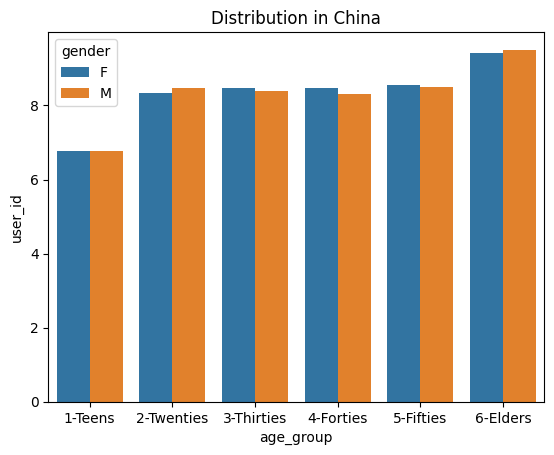

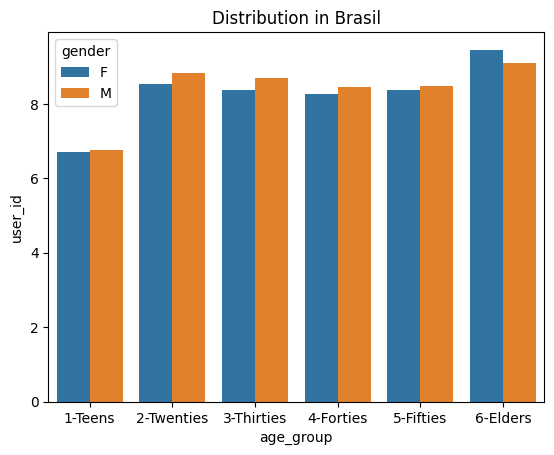

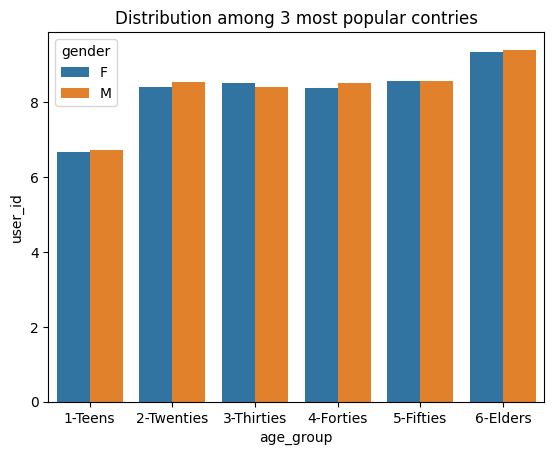

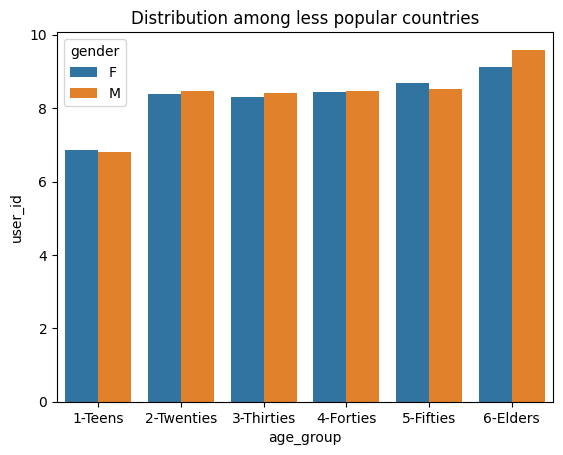

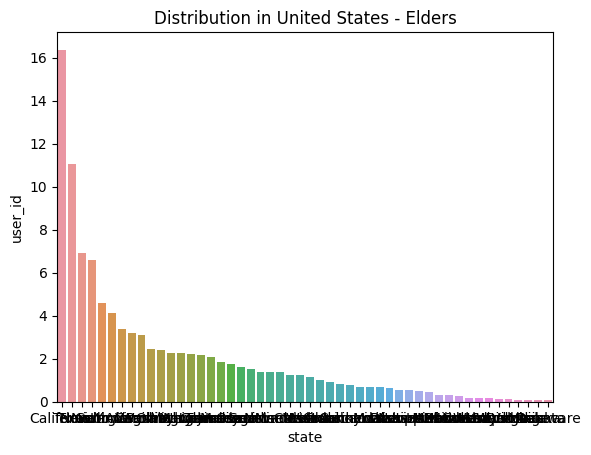

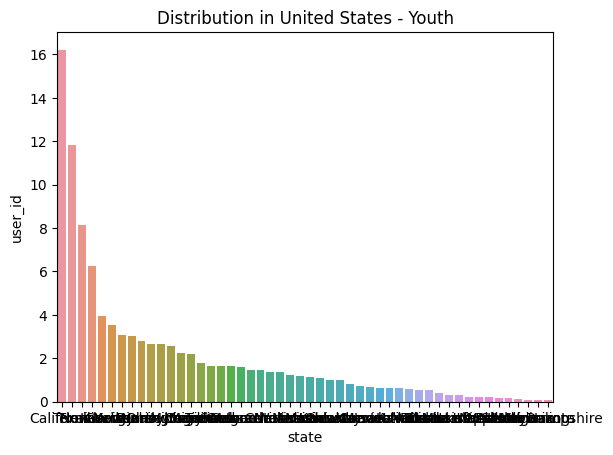

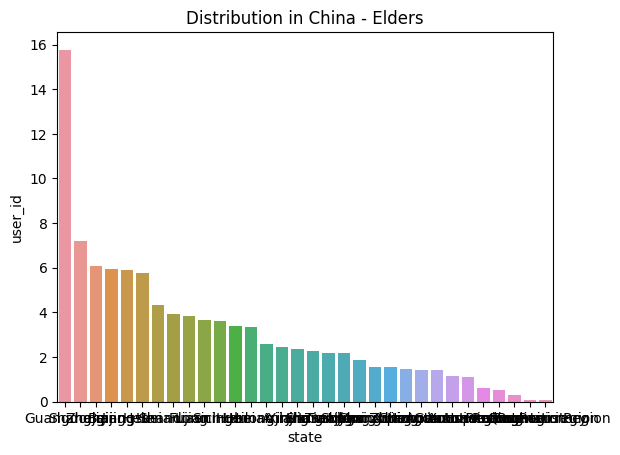

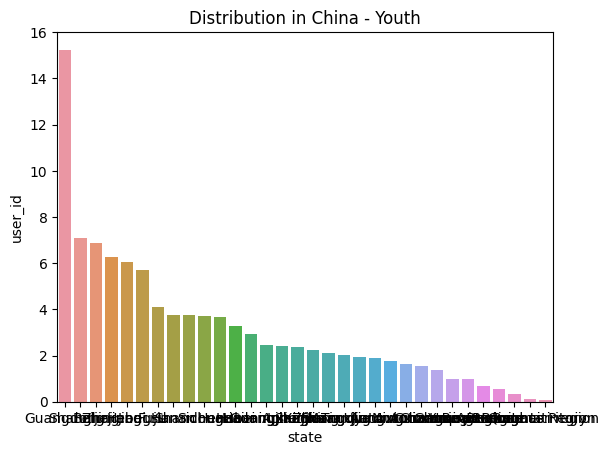

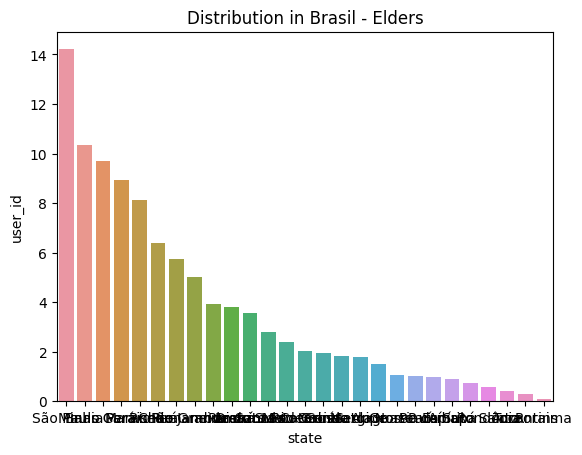

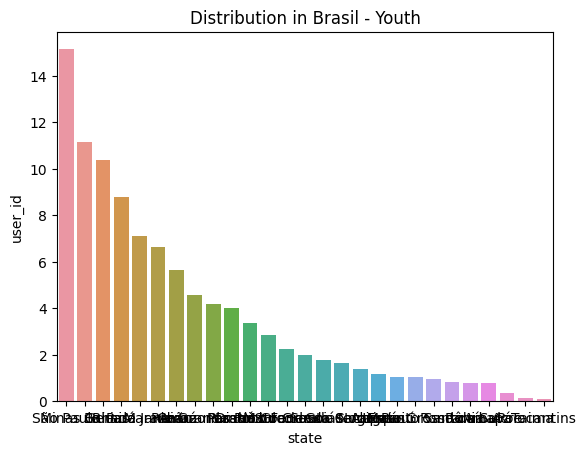

In [73]:
age_groups_count = users[["age_group","gender","user_id"]].groupby(["age_group","gender"]).count().sort_values(["age_group"], ascending=True)
age_groups_count["user_id"] = age_groups_count["user_id"]/1000

count_1=0

# IN GENERAL THE DISTRIBUTION AMONG AGE GROUPS AND GENDERS IS SIMILAR, HAVING A STRICLY BIGGER AMOUNT FOR PEOPLE ABOVE 60YO

#print(age_groups_count)

age_countries_count = users[["age_group","country","user_id"]].groupby(["country","age_group"], as_index=False).count().sort_values(["country","age_group"], ascending=True)
age_countries_count["user_id"] = age_countries_count["user_id"]/1000

#print(age_countries_count)

# LIKE IT HAPPENED IN GENERAL TERMS, IF WE DIVIDE THE DATASET BY COUNTRY THE DISTRIBUTION IS SIMILAR IF WE TALK ABOUT AGE GROUP

gender_countries_count = users[["country","gender","user_id"]].groupby(["country","gender"], as_index=False).count().sort_values(["country","gender"], ascending=True)
gender_countries_count["user_id"] = gender_countries_count["user_id"]/1000

#print(gender_countries_count)

# LIKE IT HAPPENED IN GENERAL TERMS, IF WE DIVIDE THE DATASET BY COUNTRY THE DISTRIBUTION IS SIMILAR IF WE TALK ABOUT GENDERS

countries_count = users[["country","user_id"]].groupby(["country"]).count().sort_values(["user_id"], ascending=False)
countries_count["user_id"] = countries_count["user_id"]/1000

#print(countries_count)

# Study the 3 main countries
americans=users[users.country=="United States"]
chineses=users[users.country=="China"]
brazilians=users[users.country=="Brasil"]
three_most_countries=pd.concat([americans, chineses,brazilians])

#AMERICANS
age_groups_us_count = americans[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_us_count["user_id"] = age_groups_us_count["user_id"]/americans["user_id"].count()*100

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_us_count, x="age_group", y="user_id", hue="gender")
x.set_title("Distribution in United States")

#CHINESES
age_groups_ch_count = chineses[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_ch_count["user_id"] = age_groups_ch_count["user_id"]/chineses["user_id"].count()*100

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_ch_count, x="age_group", y="user_id", hue="gender")
x.set_title("Distribution in China")

#BRAZILIANS
age_groups_br_count = brazilians[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_br_count["user_id"] = age_groups_br_count["user_id"]/brazilians["user_id"].count()*100

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_br_count, x="age_group", y="user_id", hue="gender")
x.set_title("Distribution in Brasil")

age_groups_3_count = three_most_countries[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_3_count["user_id"] = age_groups_3_count["user_id"]/three_most_countries["user_id"].count()*100

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_3_count, x="age_group", y="user_id", hue="gender")
x.set_title("Distribution among 3 most popular contries")

# Study all countries but the 3 most popular
less_popular_countries=users[(users.country!="United States") & (users.country!="China") & (users.country!="Brasil")]

age_groups_less_count = less_popular_countries[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_less_count["user_id"] = age_groups_less_count["user_id"]/less_popular_countries["user_id"].count()*100

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_less_count, x="age_group", y="user_id", hue="gender")
x.set_title("Distribution among less popular countries")

## COMMENTS: The distribution is similar for all countries and the trend is to elder people be strictly more representative.

#Study by state
#ELDERS AMERICANS
americans_elders = americans[americans["age_group"]=="6-Elders"]
age_groups_us_elders_count = americans_elders[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
age_groups_us_elders_count["user_id"] = age_groups_us_elders_count["user_id"]/americans_elders["user_id"].count()*100

print(age_groups_us_elders_count.head(3))

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_us_elders_count, x="state", y="user_id")
x.set_title("Distribution in United States - Elders")

#YOUTH AMERICANS
americans_youth = americans[americans["age_group"]=="1-Teens"]
age_groups_us_youth_count = americans_youth[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
age_groups_us_youth_count["user_id"] = age_groups_us_youth_count["user_id"]/americans_youth["user_id"].count()*100

print(age_groups_us_youth_count.head(3))

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_us_youth_count, x="state", y="user_id")
x.set_title("Distribution in United States - Youth")

#ELDERS CHINESE
chineses_elders = chineses[chineses["age_group"]=="6-Elders"]
age_groups_ch_elders_count = chineses_elders[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
age_groups_ch_elders_count["user_id"] = age_groups_ch_elders_count["user_id"]/chineses_elders["user_id"].count()*100

print(age_groups_ch_elders_count.head(3))

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_ch_elders_count, x="state", y="user_id")
x.set_title("Distribution in China - Elders")

#YOUTH CHINESE
chineses_youth = chineses[chineses["age_group"]=="1-Teens"]
age_groups_ch_youth_count = chineses_youth[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
age_groups_ch_youth_count["user_id"] = age_groups_ch_youth_count["user_id"]/chineses_youth["user_id"].count()*100

print(age_groups_ch_youth_count.head(3))

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_ch_youth_count, x="state", y="user_id")
x.set_title("Distribution in China - Youth")

#ELDERS BRASILIAN
brazilians_elders = brazilians[brazilians["age_group"]=="6-Elders"]
age_groups_br_elders_count = brazilians_elders[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
age_groups_br_elders_count["user_id"] = age_groups_br_elders_count["user_id"]/brazilians_elders["user_id"].count()*100

print(age_groups_br_elders_count.head(3))

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_br_elders_count, x="state", y="user_id")
x.set_title("Distribution in Brasil - Elders")

#YOUTH BRASILIAN
brazilians_youth = brazilians[brazilians["age_group"]=="1-Teens"]
age_groups_br_youth_count = brazilians_youth[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
age_groups_br_youth_count["user_id"] = age_groups_br_youth_count["user_id"]/brazilians_youth["user_id"].count()*100

print(age_groups_br_youth_count.head(3))

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_br_youth_count, x="state", y="user_id")
x.set_title("Distribution in Brasil - Youth")



# 2. Which countries and age groups spend more money on ecommerce, considering absolute values?

       user_id        cost         name_y        country  retail_price  \
15321    19152  920.298200  Margaret Diaz  United States   1885.899997   
498        645  811.522620   Tony Jackson  United States   1660.490000   
30890    38592  695.723722   Steven Bauer      Australia   1639.230001   

       income_perc  costumer_time   age_group  
15321            4             10  3-Thirties  
498              5            121   5-Fifties  
30890            6            634  2-Twenties  


Text(0.5, 1.0, 'Retail price by country and age group')

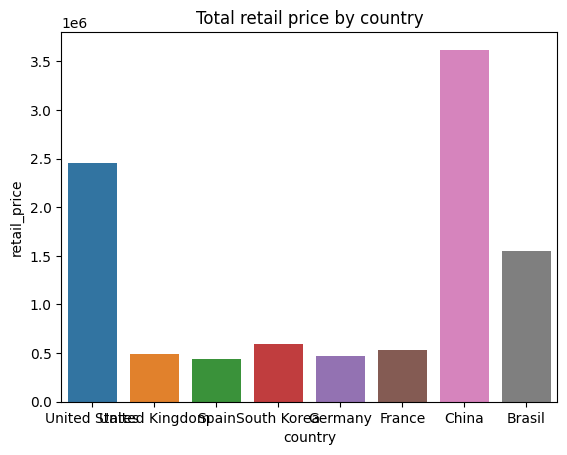

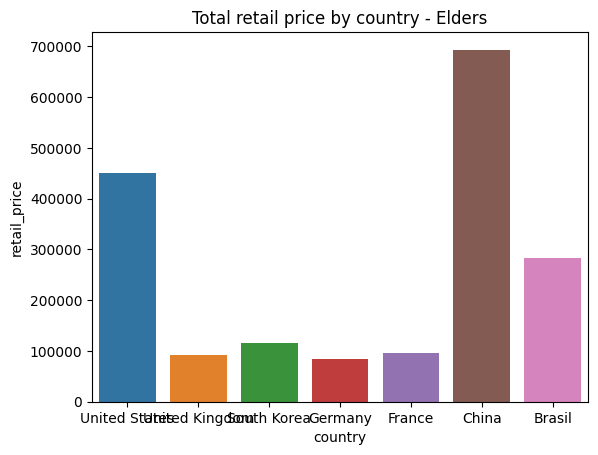

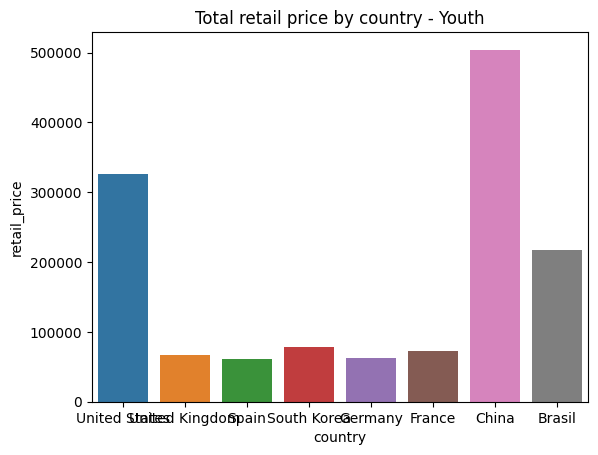

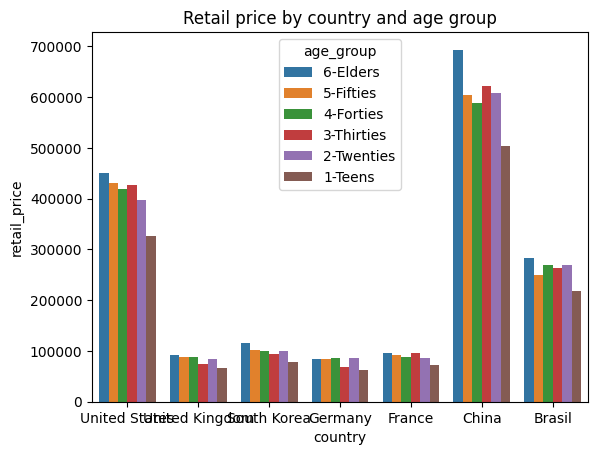

In [152]:
count_2 = 0

products_users["income"] = (products_users["retail_price"] - products_users["cost"]) 
products_users["income_perc"] = (products_users["retail_price"] - products_users["cost"]) / products_users["cost"] * 100

products_users_clean = pd.merge(products_users, users, on='user_id', how='inner')
products_users_clean = products_users_clean[["user_id","name_y","id","cost","category","brand","retail_price","income","income_perc","country","age_group","costumer_time","gender"]]

incomes_users = products_users_clean[["user_id","country","cost","name_y","retail_price","income_perc","costumer_time","age_group"]].groupby(["user_id"],as_index=False).agg({'cost': 'sum', 'name_y': 'max' ,'country': 'max' ,'retail_price': 'sum', 'income_perc': 'count', 'costumer_time':'max', 'age_group': 'max'}).sort_values(["retail_price"], ascending=False)
incomes_users_elders = incomes_users[incomes_users["age_group"]=="6-Elders"]
incomes_users_youth = incomes_users[incomes_users["age_group"]=="1-Teens"]

print(incomes_users.head(3))

incomes_users_by_country = incomes_users[["country","retail_price","income_perc"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'income_perc': 'count'}).sort_values(["country"], ascending=False)

incomes_users_by_country_elders = incomes_users_elders[["country","retail_price","income_perc"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'income_perc': 'count'}).sort_values(["country"], ascending=False)

incomes_users_by_country_youth = incomes_users_youth[["country","retail_price","income_perc"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'income_perc': 'count'}).sort_values(["country"], ascending=False)

# Plot total retail_price of country with retail_price>=4% of total
count_2+=1
plt.figure(count_2)
x = sns.barplot(incomes_users_by_country[incomes_users_by_country["retail_price"]>=incomes_users_by_country["retail_price"].sum()*0.04], x="country", y="retail_price")
x.set_title("Total retail price by country")

# Plot total retail_price of country with retail_price>=4% of total (Elders)
count_2+=1
plt.figure(count_2)
x = sns.barplot(incomes_users_by_country_elders[incomes_users_by_country_elders["retail_price"]>=incomes_users_by_country_elders["retail_price"].sum()*0.04], x="country", y="retail_price")
x.set_title("Total retail price by country - Elders")

# Plot total retail_price of country with retail_price>=4% of total (Youth)
count_2+=1
plt.figure(count_2)
x = sns.barplot(incomes_users_by_country_youth[incomes_users_by_country_youth["retail_price"]>=incomes_users_by_country_youth["retail_price"].sum()*0.04], x="country", y="retail_price")
x.set_title("Total retail price by country - Youth")

# Plot the seven countries that spend more money, divided by age group
incomes_users_by_contry = incomes_users[["country","age_group","retail_price","income_perc"]].groupby(["country","age_group"],as_index=False).agg({'retail_price': 'sum', 'income_perc': 'count'}).sort_values(["country","age_group"], ascending=False)

count_2+=1
plt.figure(count_2)
x = sns.barplot(incomes_users_by_contry[incomes_users_by_contry["country"].isin(["United States","China","Brasil","South Korea","United Kingdom","Germany","France"])], x="country", y="retail_price", hue="age_group")
x.set_title("Retail price by country and age group")

# Looking for the results we can easily see that China, USA and Brasil are the countries that spend more money in general and the age group is the elders in most of the countries.



# 3. Which countries and age groups spend more money on ecommerce, considering relative values?

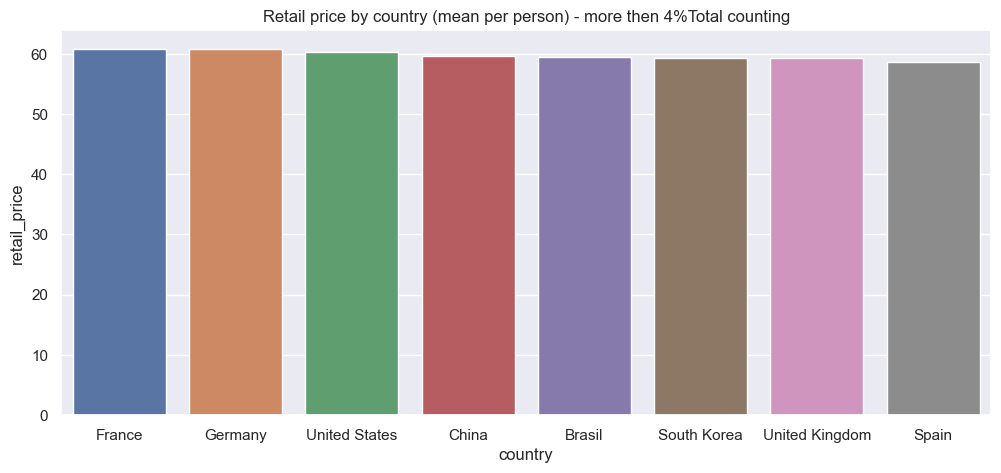

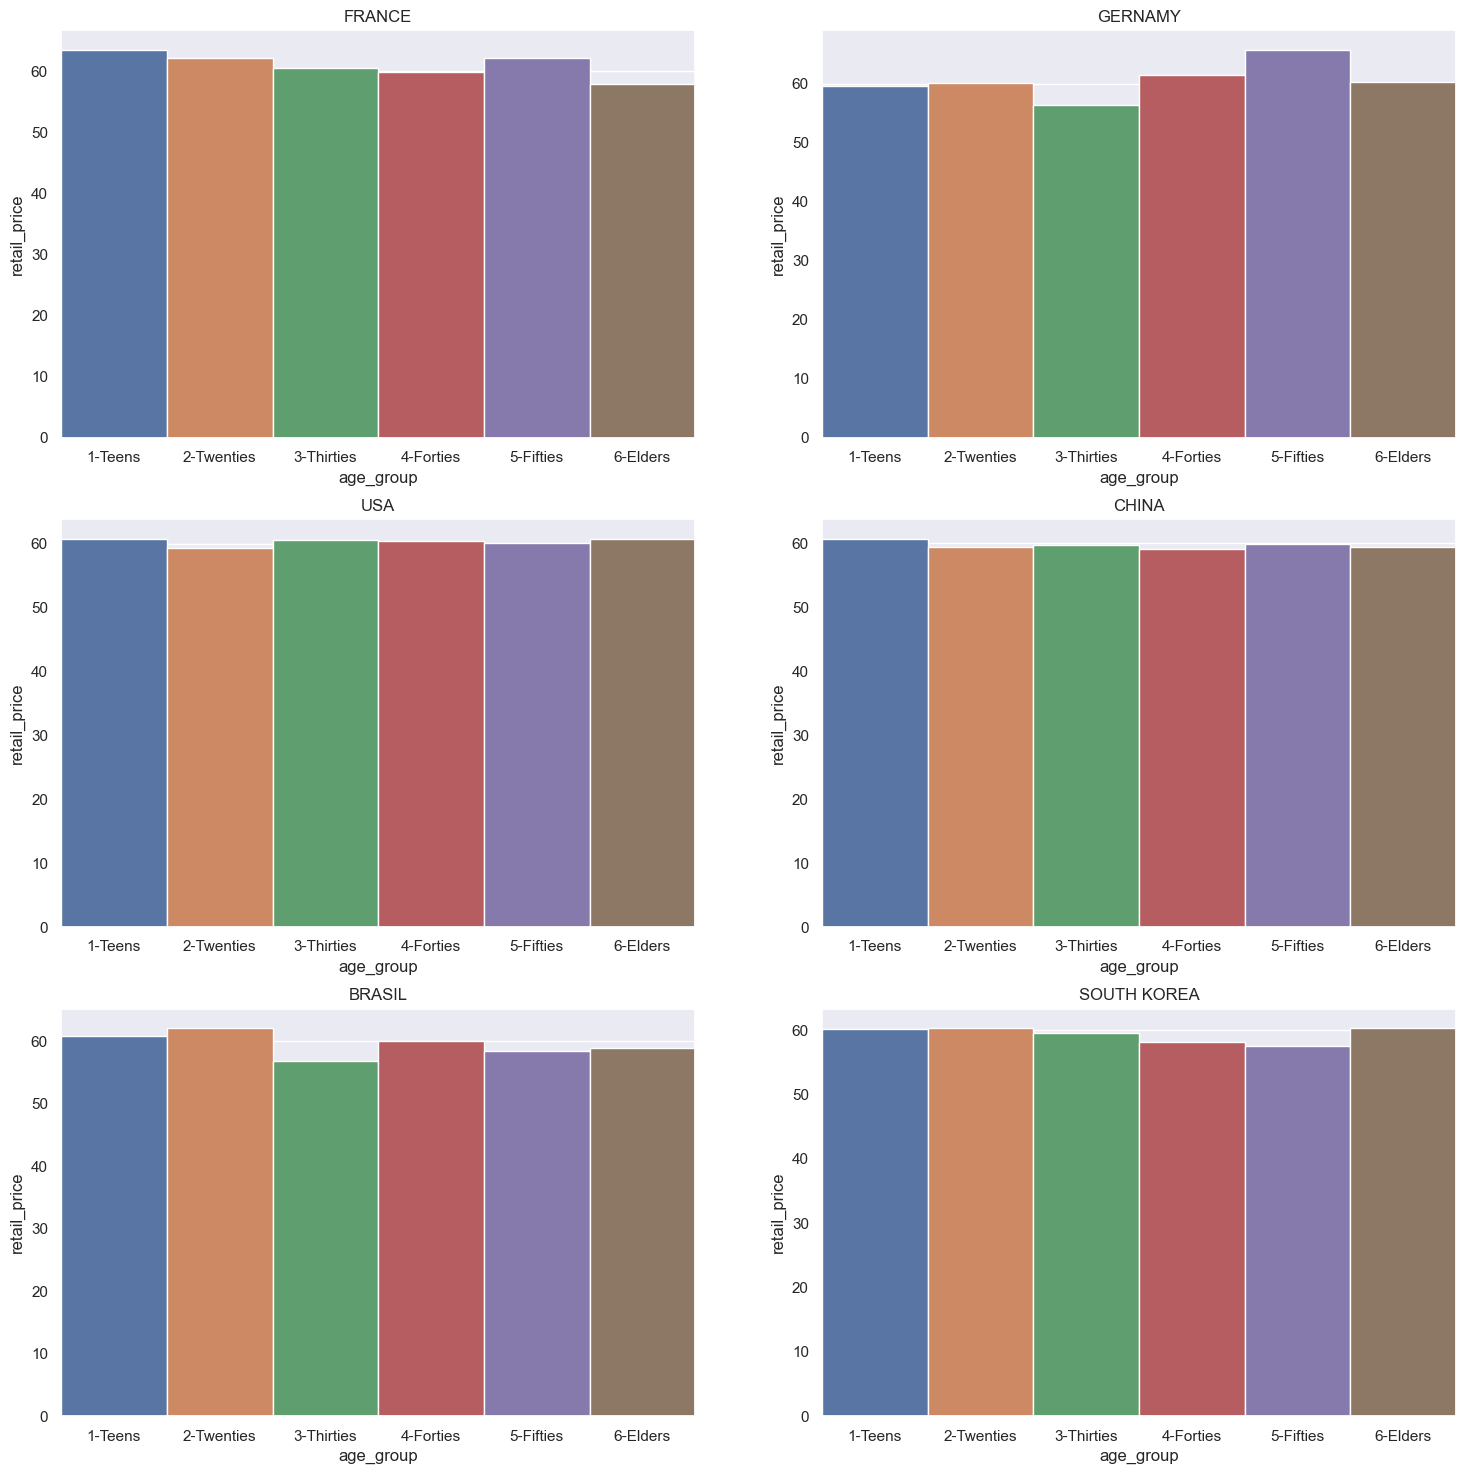

Text(0.5, 1.0, 'Margin by country (mean per person) - more then 4%Total counting')

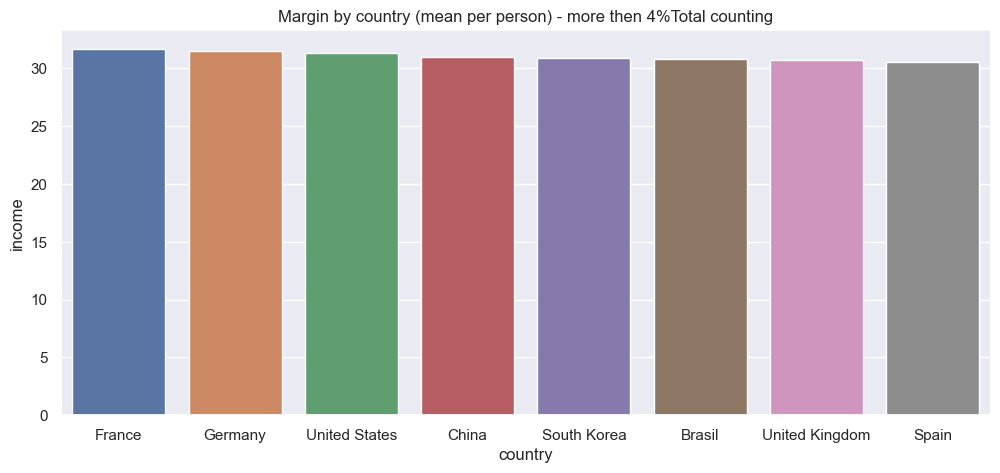

In [200]:
count_3 = 0

avg_incomes_users_relative = products_users_clean[["user_id","country","income","name_y","retail_price","income_perc","costumer_time","age_group"]].groupby(["user_id"],as_index=False).agg({'name_y': 'max', 'income':'mean','country': 'max' ,'retail_price': 'mean', 'income_perc': 'count', 'costumer_time':'max', 'age_group': 'max'}).sort_values(["retail_price"], ascending=False)

avg_incomes_users_relative_by_country = avg_incomes_users_relative[["country","retail_price","income_perc"]].groupby(["country"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["retail_price"], ascending=False)

#Plot the mean retail price per person for the country with more than 4% Total Population

count_3+=1
fig = plt.figure(count_3)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_incomes_users_relative_by_country[avg_incomes_users_relative_by_country["income_perc"]>=avg_incomes_users_relative_by_country["income_perc"].sum()*0.04], x="country", y="retail_price")
x.set_title("Retail price by country (mean per person) - more then 4%Total counting")

#print(avg_incomes_users_relative)

avg_incomes_users_relative_fr = avg_incomes_users_relative[avg_incomes_users_relative["country"]=="France"][["age_group","retail_price","income_perc"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["age_group"], ascending=True)
avg_incomes_users_relative_ge = avg_incomes_users_relative[avg_incomes_users_relative["country"]=="Germany"][["age_group","retail_price","income_perc"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["age_group"], ascending=True)
avg_incomes_users_relative_us = avg_incomes_users_relative[avg_incomes_users_relative["country"]=="United States"][["age_group","retail_price","income_perc"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["age_group"], ascending=True)
avg_incomes_users_relative_ch = avg_incomes_users_relative[avg_incomes_users_relative["country"]=="China"][["age_group","retail_price","income_perc"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["age_group"], ascending=True)
avg_incomes_users_relative_br = avg_incomes_users_relative[avg_incomes_users_relative["country"]=="Brasil"][["age_group","retail_price","income_perc"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["age_group"], ascending=True)
avg_incomes_users_relative_sk = avg_incomes_users_relative[avg_incomes_users_relative["country"]=="South Korea"][["age_group","retail_price","income_perc"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["age_group"], ascending=True)

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(3, 2)
fig.set(figheight=18,figwidth=18)

#create boxplot in each subplot
sns.barplot(avg_incomes_users_relative_fr, x="age_group", y="retail_price", ax=axes[0,0], width=1).set_title("FRANCE")
sns.barplot(avg_incomes_users_relative_ge, x="age_group", y="retail_price", ax=axes[0,1], width=1).set_title("GERNAMY")
sns.barplot(avg_incomes_users_relative_us, x="age_group", y="retail_price", ax=axes[1,0], width=1).set_title("USA")
sns.barplot(avg_incomes_users_relative_ch, x="age_group", y="retail_price", ax=axes[1,1], width=1).set_title("CHINA")
sns.barplot(avg_incomes_users_relative_br, x="age_group", y="retail_price", ax=axes[2,0], width=1).set_title("BRASIL")
sns.barplot(avg_incomes_users_relative_sk, x="age_group", y="retail_price", ax=axes[2,1], width=1).set_title("SOUTH KOREA")
plt.show()

#Looking for the 6 more popular countries, we can see that the difference between age groups is low, but in average the money spend by person is strictly high on the youth

#Study of margin instead of price
avg_margin_users_relative_by_country = avg_incomes_users_relative[["country","income","income_perc"]].groupby(["country"],as_index=False).agg({'income': 'mean', 'income_perc': 'count'}).sort_values(["income"], ascending=False)

#Plot the mean retail price per person for the country with more than 4% Total Population

count_3+=1
fig = plt.figure(count_3)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_margin_users_relative_by_country[avg_margin_users_relative_by_country["income_perc"]>=avg_margin_users_relative_by_country["income_perc"].sum()*0.04], x="country", y="income")
x.set_title("Margin by country (mean per person) - more then 4%Total counting")


# 4. Which countries and genders spend more money on ecommerce?

Text(0.5, 1.0, 'Retail price by country and gender - abs values')

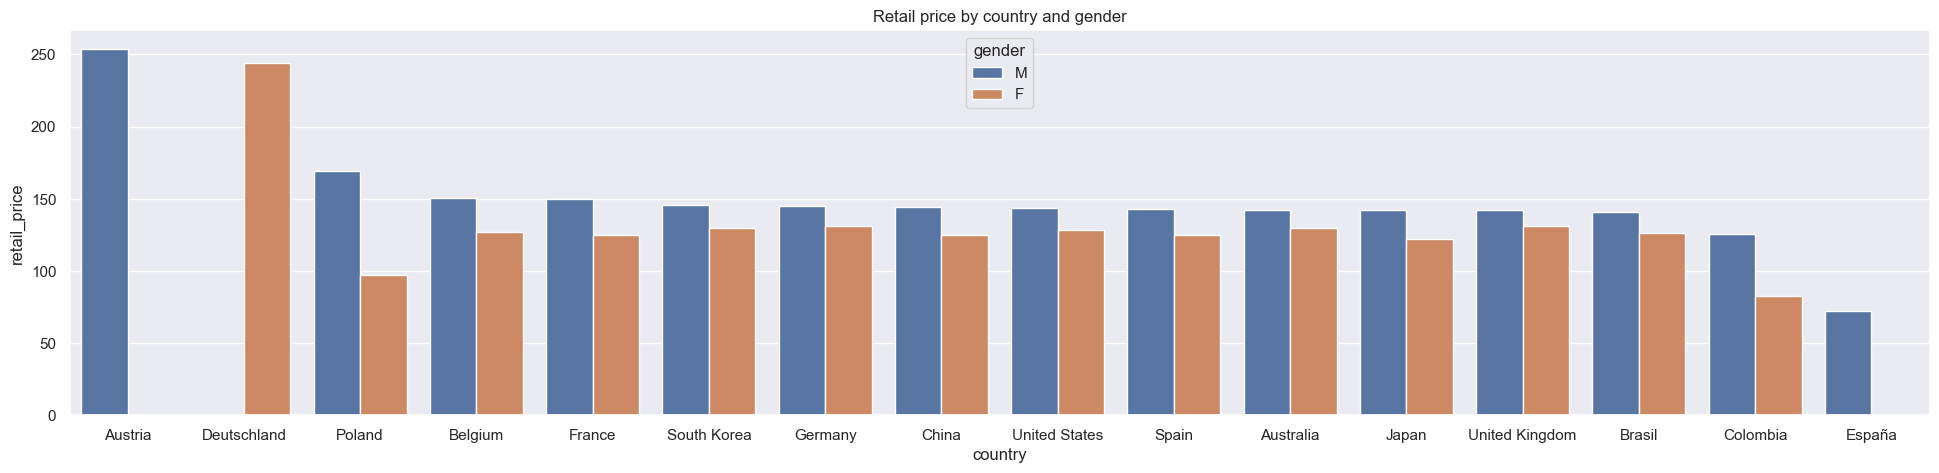

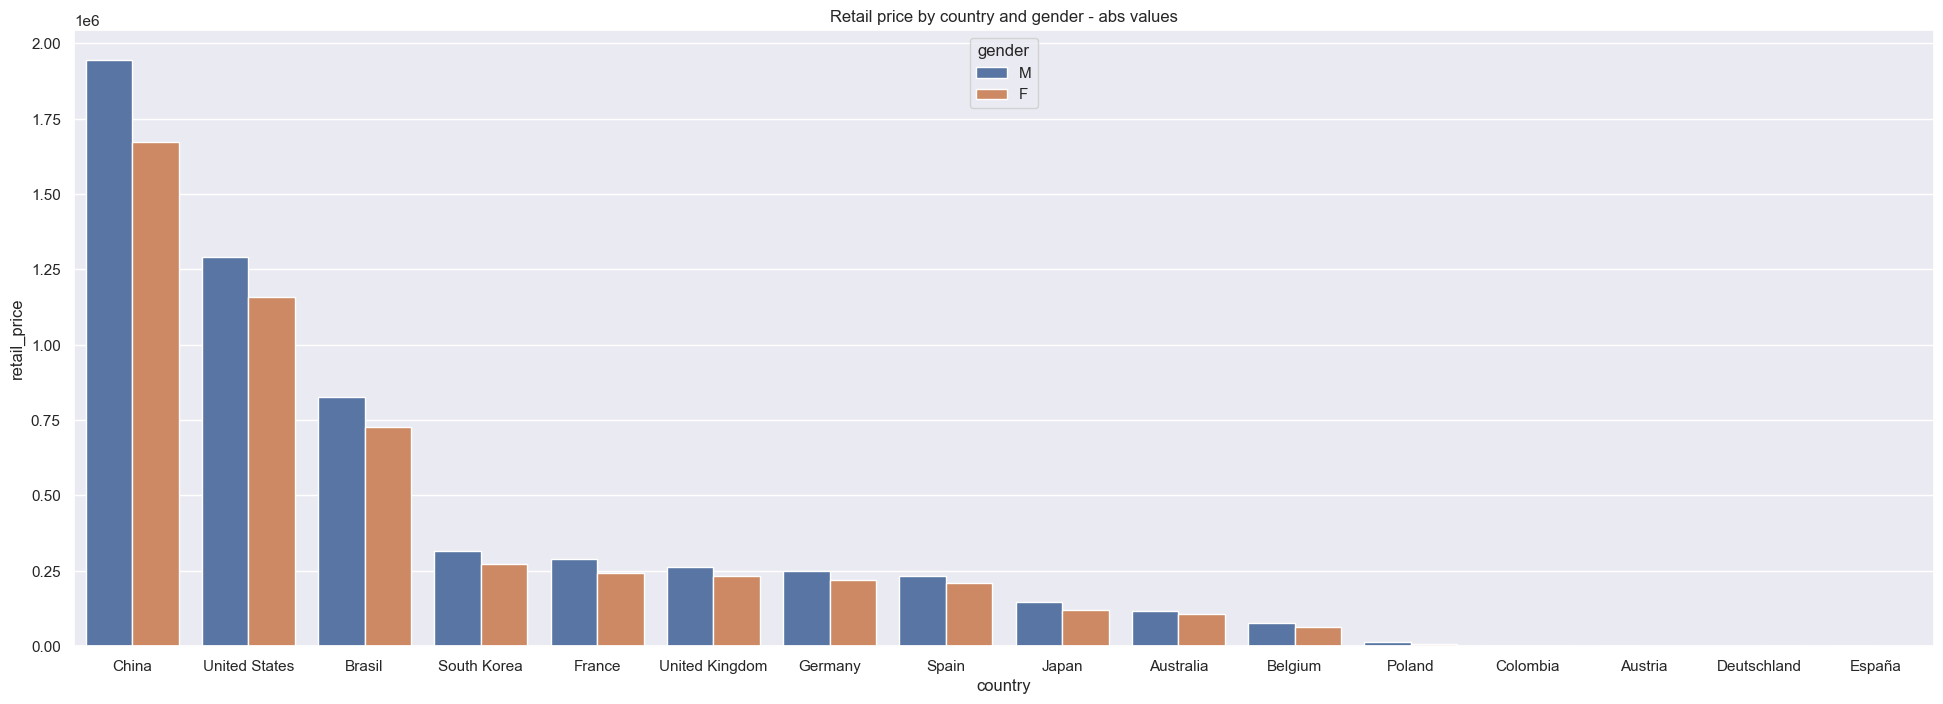

In [203]:
count_4 = 0

avg_incomes_users_relative_genders = products_users_clean[["user_id","country","income","name_y","retail_price","income_perc","costumer_time","gender"]].groupby(["user_id"],as_index=False).agg({'name_y': 'max', 'income':'sum','country': 'max' ,'retail_price': 'sum', 'income_perc': 'count', 'costumer_time':'max', 'gender': 'max'}).sort_values(["retail_price"], ascending=False)
avg_incomes_users_relative_genders_by_country = avg_incomes_users_relative_genders[["country","retail_price","income_perc","gender"]].groupby(["country","gender"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["retail_price"], ascending=False)

count_4+=1
fig = plt.figure(count_4)
fig.set(figheight=5,figwidth=24)
x = sns.barplot(avg_incomes_users_relative_genders_by_country, x="country", y="retail_price",hue="gender")
x.set_title("Retail price by country and gender")

avg_incomes_users_abs_genders = products_users_clean[["user_id","country","income","name_y","retail_price","income_perc","costumer_time","gender"]].groupby(["user_id"],as_index=False).agg({'name_y': 'max', 'income':'sum','country': 'max' ,'retail_price': 'sum', 'income_perc': 'count', 'costumer_time':'max', 'gender': 'max'}).sort_values(["retail_price"], ascending=False)
avg_incomes_users_abs_genders_by_country = avg_incomes_users_abs_genders[["country","retail_price","income_perc","gender"]].groupby(["country","gender"],as_index=False).agg({'retail_price': 'sum', 'income_perc': 'count'}).sort_values(["retail_price"], ascending=False)

count_4+=1
fig = plt.figure(count_4)
fig.set(figheight=8,figwidth=24)
x = sns.barplot(avg_incomes_users_abs_genders_by_country, x="country", y="retail_price",hue="gender")
x.set_title("Retail price by country and gender - abs values")


# 5. Which countries and age groups spend more money on ecommerce, for F and M?

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.653529;0.352273x0.226471)


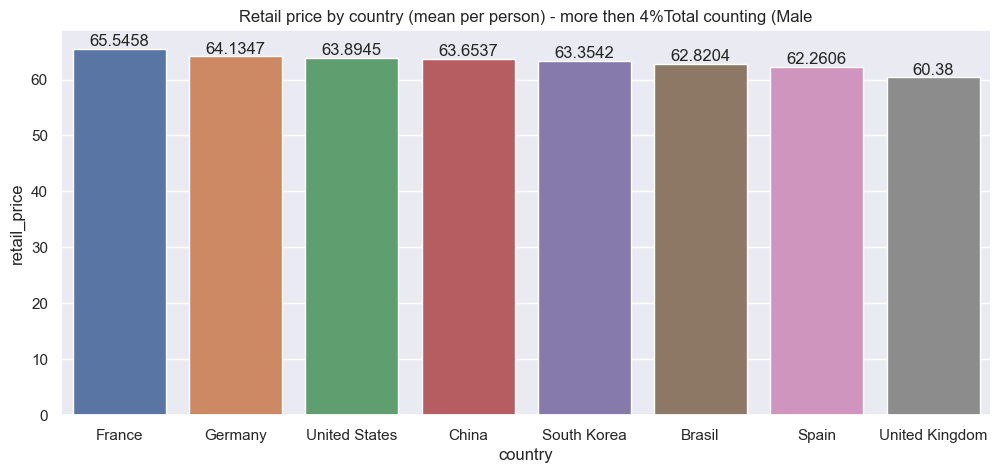

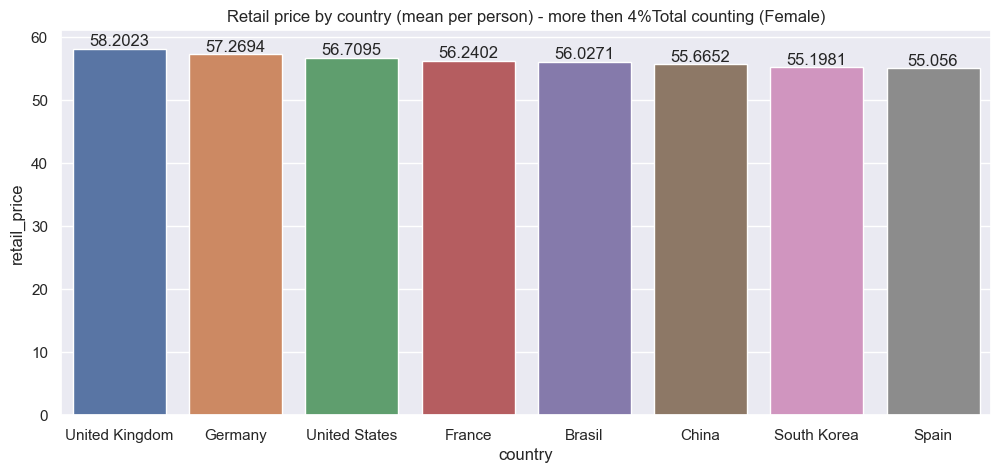

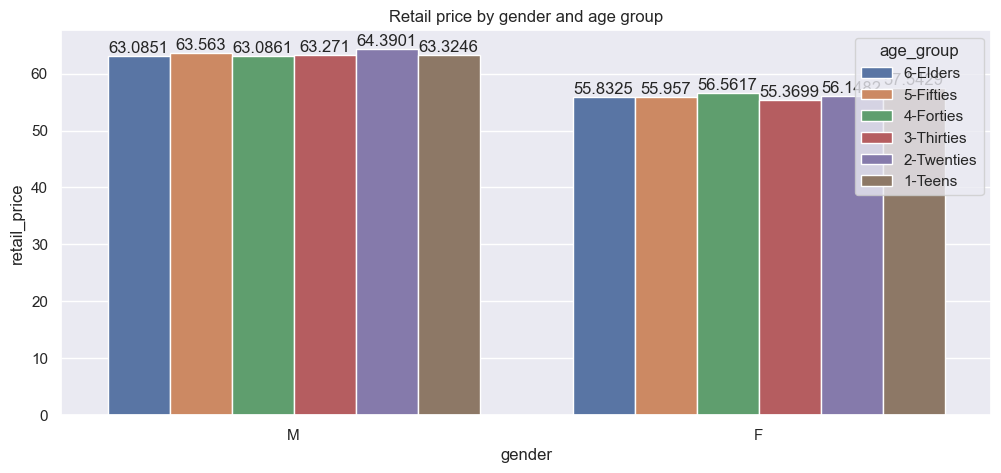

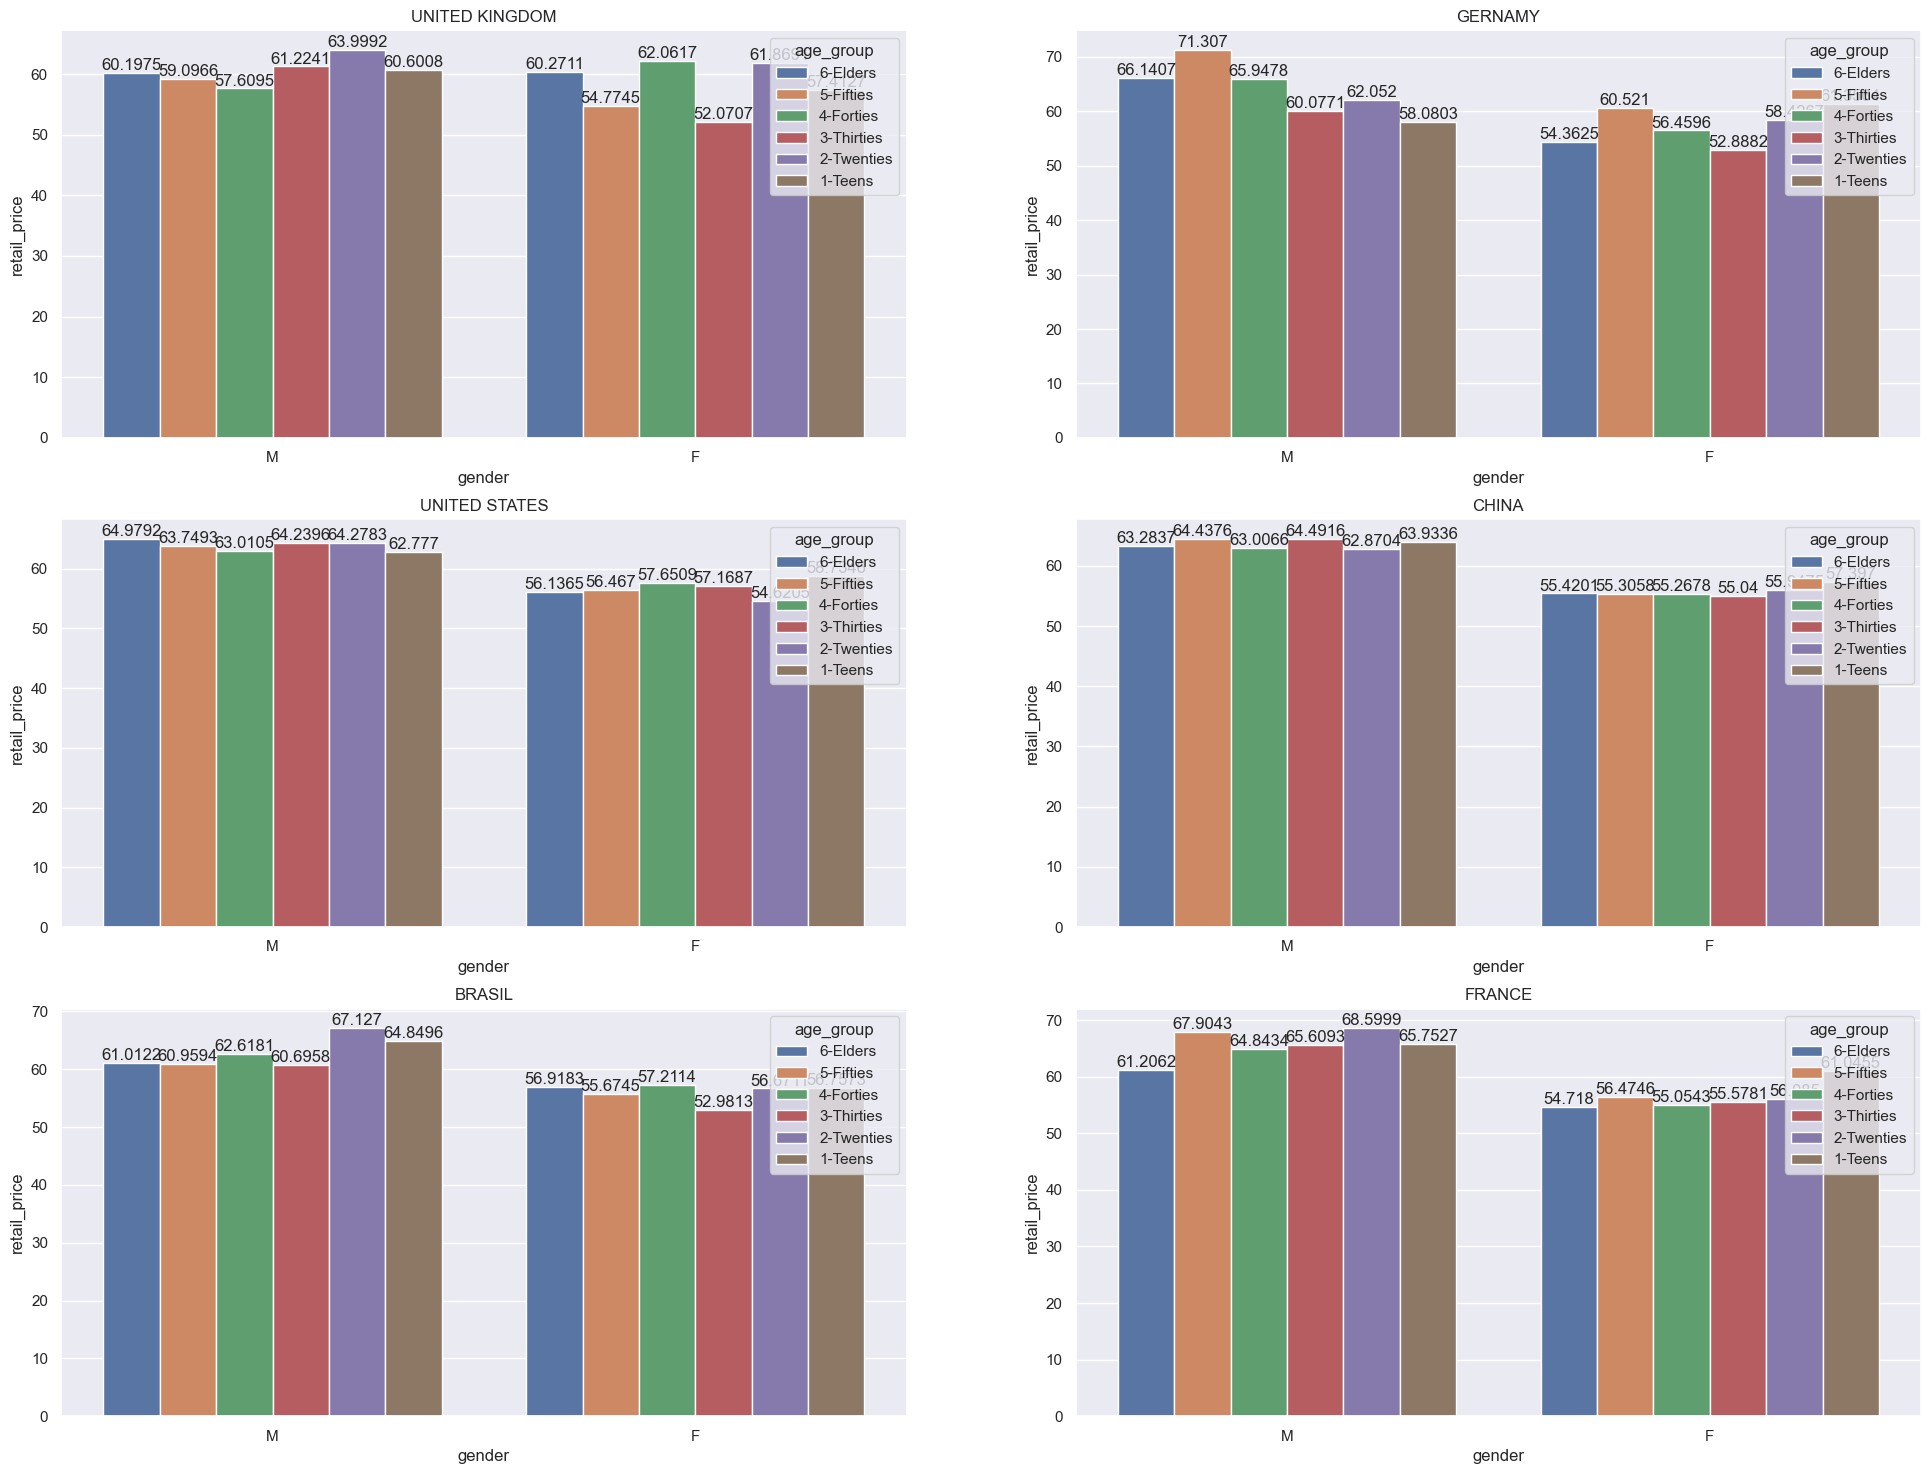

In [223]:
count_5 = 0

avg_incomes_users_relative = products_users_clean[["user_id","country","income","name_y","retail_price","income_perc","costumer_time","age_group","gender"]].groupby(["user_id"],as_index=False).agg({'name_y': 'max', 'income':'mean','country': 'max' ,'retail_price': 'mean', 'income_perc': 'count', 'costumer_time':'max', 'age_group': 'max', 'gender': 'max'}).sort_values(["retail_price"], ascending=False)

avg_incomes_users_relative_by_country_m = avg_incomes_users_relative[avg_incomes_users_relative["gender"]=="M"][["country","retail_price","income_perc"]].groupby(["country"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["retail_price"], ascending=False)
avg_incomes_users_relative_by_country_f = avg_incomes_users_relative[avg_incomes_users_relative["gender"]=="F"][["country","retail_price","income_perc"]].groupby(["country"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["retail_price"], ascending=False)

#Plot the mean retail price per person for the country with more than 4% Total Population (Male)

count_5+=1
fig = plt.figure(count_5)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_incomes_users_relative_by_country_m[avg_incomes_users_relative_by_country_m["income_perc"]>=avg_incomes_users_relative_by_country_m["income_perc"].sum()*0.04], x="country", y="retail_price")
x.set_title("Retail price by country (mean per person) - more then 4%Total counting (Male")

for i in x.containers:
    x.bar_label(i,)

count_5+=1
fig = plt.figure(count_5)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_incomes_users_relative_by_country_f[avg_incomes_users_relative_by_country_f["income_perc"]>=avg_incomes_users_relative_by_country_f["income_perc"].sum()*0.04], x="country", y="retail_price")
x.set_title("Retail price by country (mean per person) - more then 4%Total counting (Female)")

for i in x.containers:
    x.bar_label(i,)

# Retail price by gender and age group
avg_incomes_users_relative_by_gender_ag = avg_incomes_users_relative[["gender","age_group","retail_price","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False)

count_5+=1
fig = plt.figure(count_5)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_incomes_users_relative_by_gender_ag, x="gender", y="retail_price", hue="age_group")
x.set_title("Retail price by gender and age group")
print(x)
for i in x.containers:
    x.bar_label(i,)

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(3, 2)
fig.set(figheight=18,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(avg_incomes_users_relative[avg_incomes_users_relative.country=="United Kingdom"][["gender","age_group","retail_price","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="retail_price", hue="age_group", ax=axes[0,0], width=0.8)
x1.set_title("UNITED KINGDOM")
print(x1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(avg_incomes_users_relative[avg_incomes_users_relative.country=="Germany"][["gender","age_group","retail_price","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="retail_price", hue="age_group", ax=axes[0,1], width=0.8)
x2.set_title("GERNAMY")
for i in x2.containers:
    x2.bar_label(i,)
x3 = sns.barplot(avg_incomes_users_relative[avg_incomes_users_relative.country=="United States"][["gender","age_group","retail_price","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="retail_price", hue="age_group", ax=axes[1,0], width=0.8)
x3.set_title("UNITED STATES")
for i in x3.containers:
    x3.bar_label(i,)
x4 = sns.barplot(avg_incomes_users_relative[avg_incomes_users_relative.country=="China"][["gender","age_group","retail_price","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="retail_price", hue="age_group", ax=axes[1,1], width=0.8)
x4.set_title("CHINA")
for i in x4.containers:
    x4.bar_label(i,)
x5 = sns.barplot(avg_incomes_users_relative[avg_incomes_users_relative.country=="Brasil"][["gender","age_group","retail_price","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="retail_price", hue="age_group", ax=axes[2,0], width=0.8)
x5.set_title("BRASIL")
for i in x5.containers:
    x5.bar_label(i,)
x6 = sns.barplot(avg_incomes_users_relative[avg_incomes_users_relative.country=="France"][["gender","age_group","retail_price","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'mean', 'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="retail_price", hue="age_group", ax=axes[2,1], width=0.8)
x6.set_title("FRANCE")
for i in x6.containers:
    x6.bar_label(i,)
plt.show()

# 6. Which countries and age groups have more orders on ecommerce, for F and M?

       user_id               name_y      income        country  retail_price  \
15321    19152        Margaret Diaz  965.601797  United States   1885.899997   
498        645         Tony Jackson  848.967380  United States   1660.490000   
30890    38592         Steven Bauer  943.506279      Australia   1639.230001   
2439      3052        Robert Tucker  849.736956          Spain   1609.439997   
41252    51679  Christopher Sanchez  966.078566          China   1606.570013   

       income_perc  costumer_time   age_group gender  
15321            4             10  3-Thirties      F  
498              5            121   5-Fifties      M  
30890            6            634  2-Twenties      M  
2439             7           1002     1-Teens      M  
41252            6           1542   5-Fifties      M  
Axes(0.125,0.653529;0.352273x0.226471)


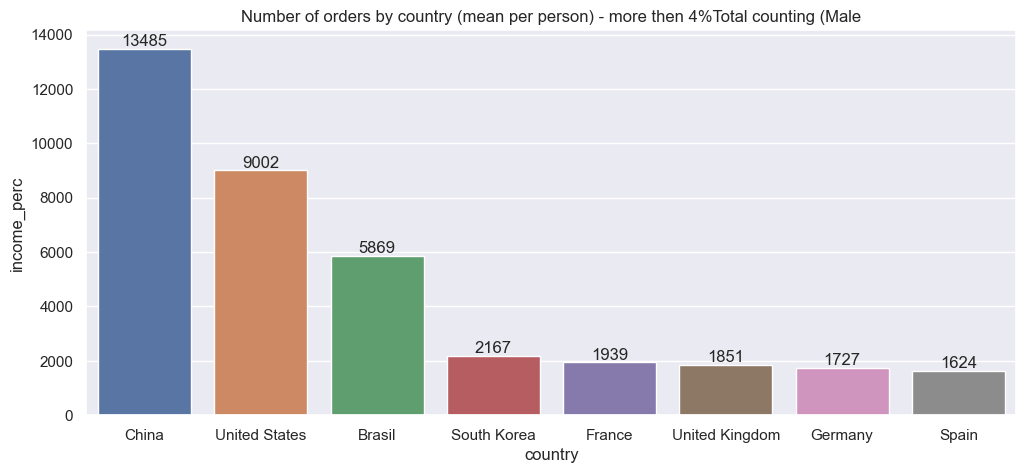

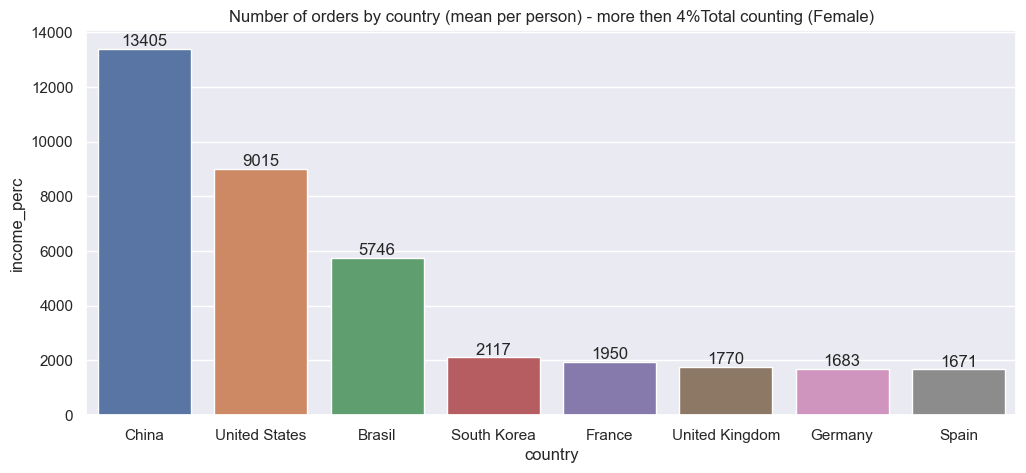

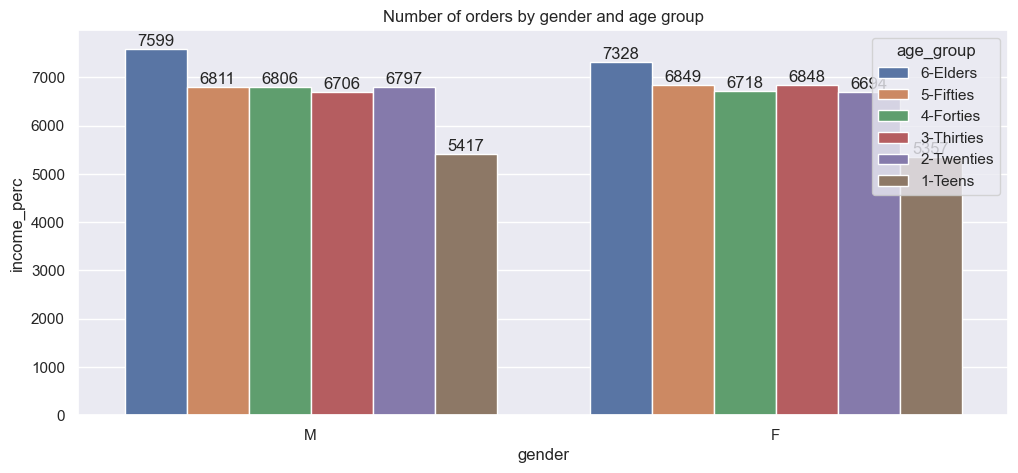

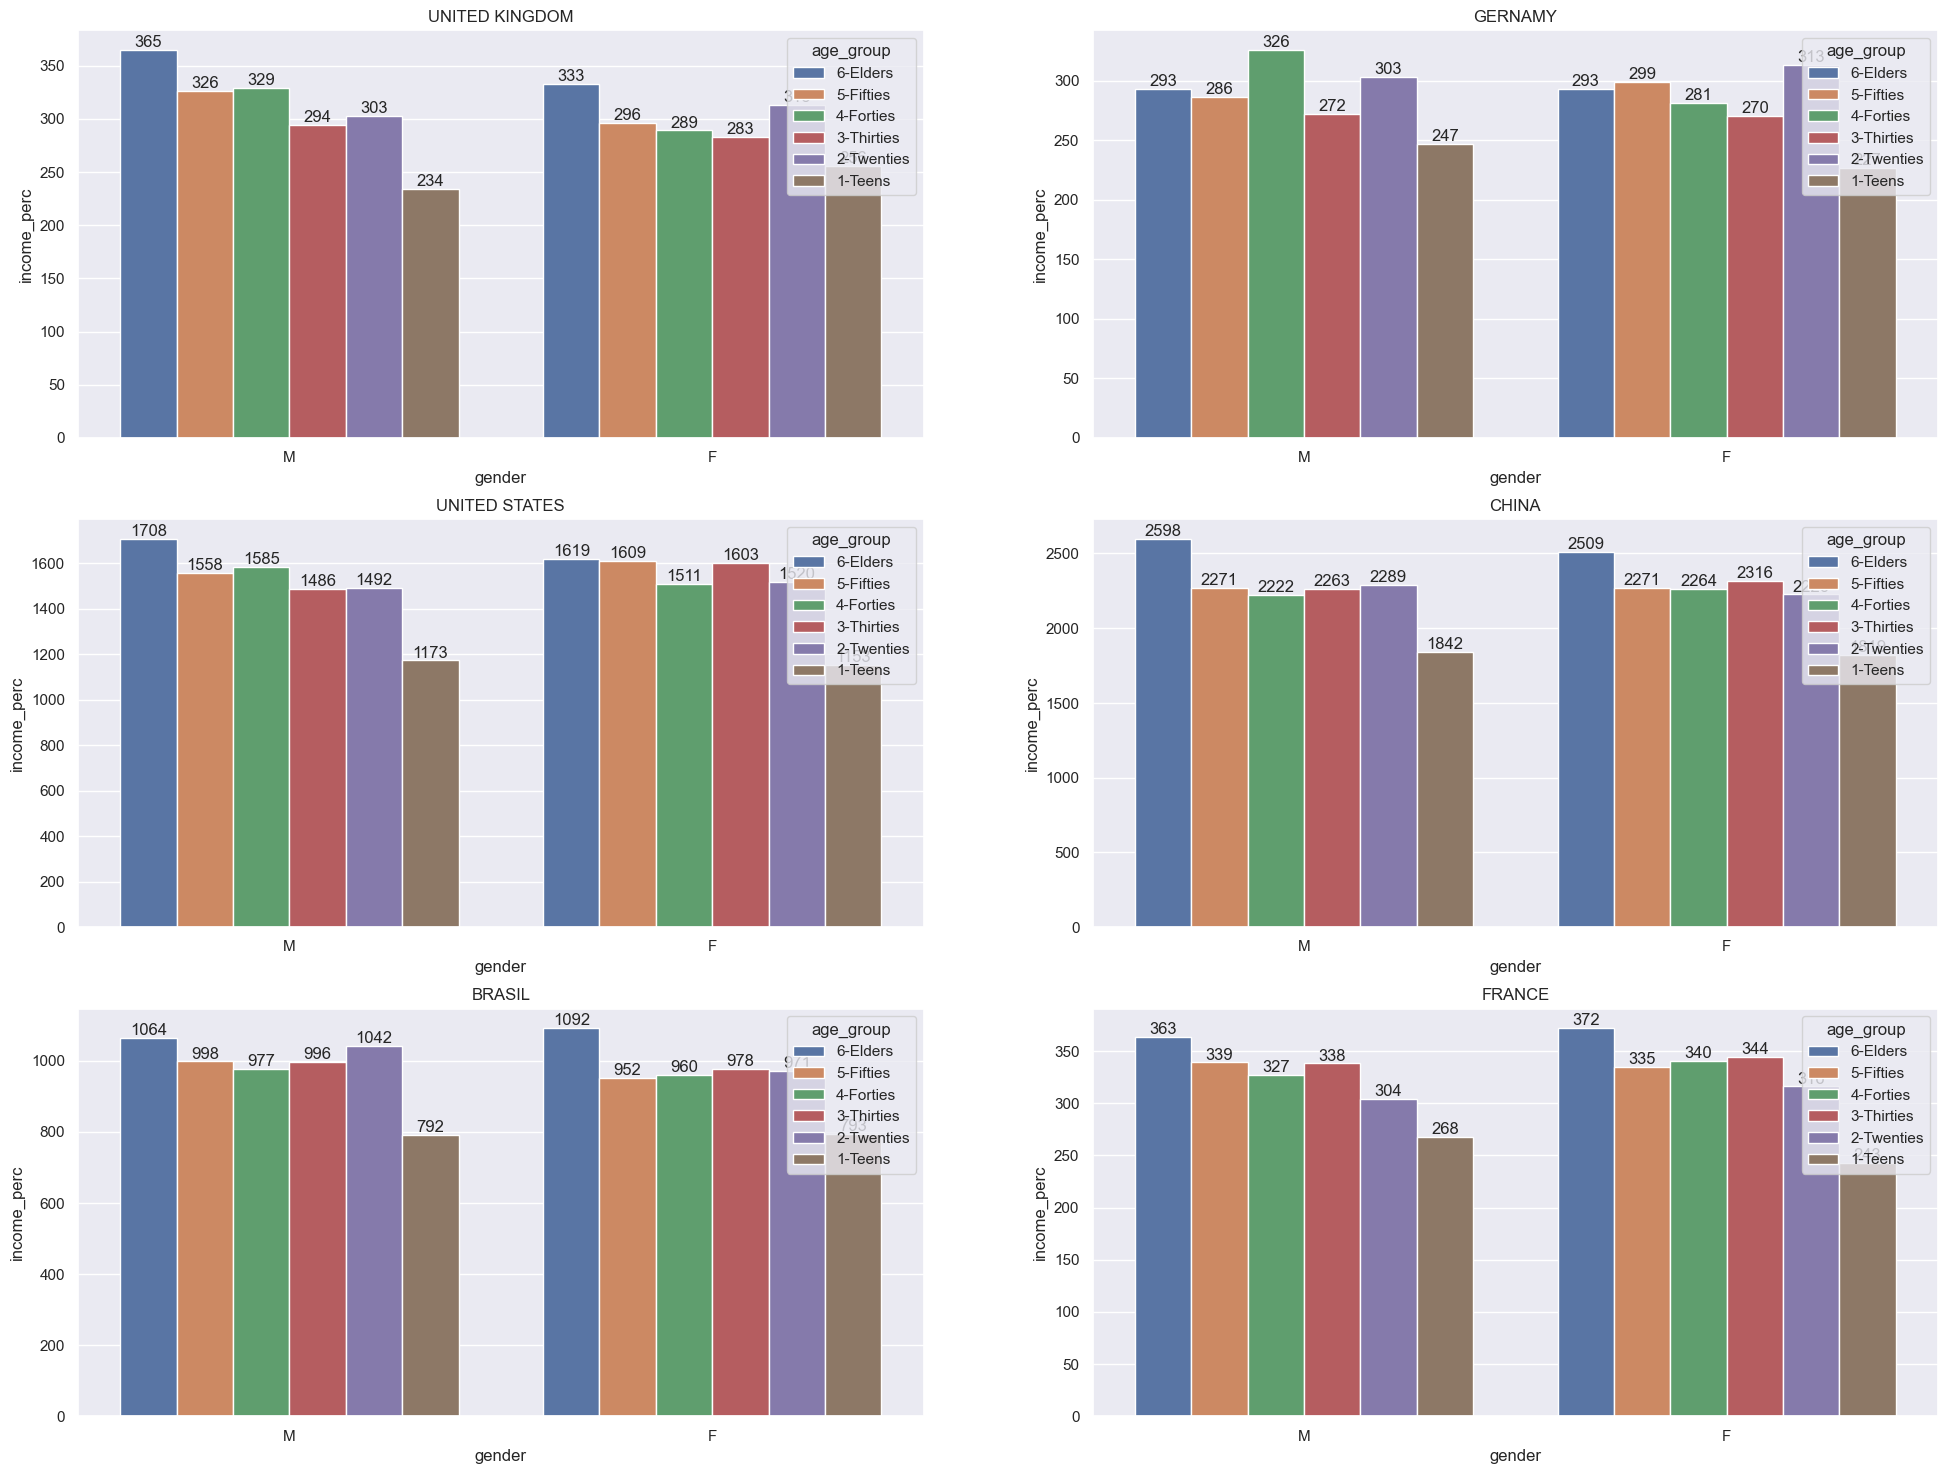

In [232]:
count_6 = 0

avg_incomes_users_relative_orders = products_users_clean[["user_id","country","income","name_y","retail_price","income_perc","costumer_time","age_group","gender"]].groupby(["user_id"],as_index=False).agg({'name_y': 'max', 'income':'sum','country': 'max' ,'retail_price': 'sum', 'income_perc': 'count', 'costumer_time':'max', 'age_group': 'max', 'gender': 'max'}).sort_values(["retail_price"], ascending=False)

print(avg_incomes_users_relative_orders.head())

avg_incomes_users_relative_by_country_orders_m = avg_incomes_users_relative_orders[avg_incomes_users_relative_orders["gender"]=="M"][["country","retail_price","income_perc"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'income_perc': 'count'}).sort_values(["income_perc"], ascending=False)
avg_incomes_users_relative_by_country_orders_f = avg_incomes_users_relative_orders[avg_incomes_users_relative_orders["gender"]=="F"][["country","retail_price","income_perc"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'income_perc': 'count'}).sort_values(["income_perc"], ascending=False)

#Plot the total number of orders for the country with more than 4% Total Population (Male)

count_6+=1
fig = plt.figure(count_6)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_incomes_users_relative_by_country_orders_m[avg_incomes_users_relative_by_country_orders_m["income_perc"]>=avg_incomes_users_relative_by_country_orders_m["income_perc"].sum()*0.04], x="country", y="income_perc")
x.set_title("Number of orders by country (mean per person) - more then 4%Total counting (Male")

for i in x.containers:
    x.bar_label(i,)

count_6+=1
fig = plt.figure(count_6)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_incomes_users_relative_by_country_orders_f[avg_incomes_users_relative_by_country_orders_f["income_perc"]>=avg_incomes_users_relative_by_country_orders_f["income_perc"].sum()*0.04], x="country", y="income_perc")
x.set_title("Number of orders by country (mean per person) - more then 4%Total counting (Female)")

for i in x.containers:
    x.bar_label(i,)

# Number of orders by gender and age group
avg_incomes_users_relative_by_gender_ag_orders = avg_incomes_users_relative_orders[["gender","age_group","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False)

count_6+=1
fig = plt.figure(count_6)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_incomes_users_relative_by_gender_ag_orders, x="gender", y="income_perc", hue="age_group")
x.set_title("Number of orders by gender and age group")

for i in x.containers:
    x.bar_label(i,)


#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(3, 2)
fig.set(figheight=18,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(avg_incomes_users_relative_orders[avg_incomes_users_relative_orders.country=="United Kingdom"][["gender","age_group","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="income_perc", hue="age_group", ax=axes[0,0], width=0.8)
x1.set_title("UNITED KINGDOM")
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(avg_incomes_users_relative_orders[avg_incomes_users_relative_orders.country=="Germany"][["gender","age_group","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="income_perc", hue="age_group", ax=axes[0,1], width=0.8)
x2.set_title("GERNAMY")
for i in x2.containers:
    x2.bar_label(i,)
x3 = sns.barplot(avg_incomes_users_relative_orders[avg_incomes_users_relative_orders.country=="United States"][["gender","age_group","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="income_perc", hue="age_group", ax=axes[1,0], width=0.8)
x3.set_title("UNITED STATES")
for i in x3.containers:
    x3.bar_label(i,)
x4 = sns.barplot(avg_incomes_users_relative_orders[avg_incomes_users_relative_orders.country=="China"][["gender","age_group","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="income_perc", hue="age_group", ax=axes[1,1], width=0.8)
x4.set_title("CHINA")
for i in x4.containers:
    x4.bar_label(i,)
x5 = sns.barplot(avg_incomes_users_relative_orders[avg_incomes_users_relative_orders.country=="Brasil"][["gender","age_group","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="income_perc", hue="age_group", ax=axes[2,0], width=0.8)
x5.set_title("BRASIL")
for i in x5.containers:
    x5.bar_label(i,)
x6 = sns.barplot(avg_incomes_users_relative_orders[avg_incomes_users_relative_orders.country=="France"][["gender","age_group","income_perc"]].groupby(["gender","age_group"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","age_group"], ascending=False), x="gender", y="income_perc", hue="age_group", ax=axes[2,1], width=0.8)
x6.set_title("FRANCE")
for i in x6.containers:
    x6.bar_label(i,)
plt.show()
#"""

# 7. How the products are distributed among gender and age groups?

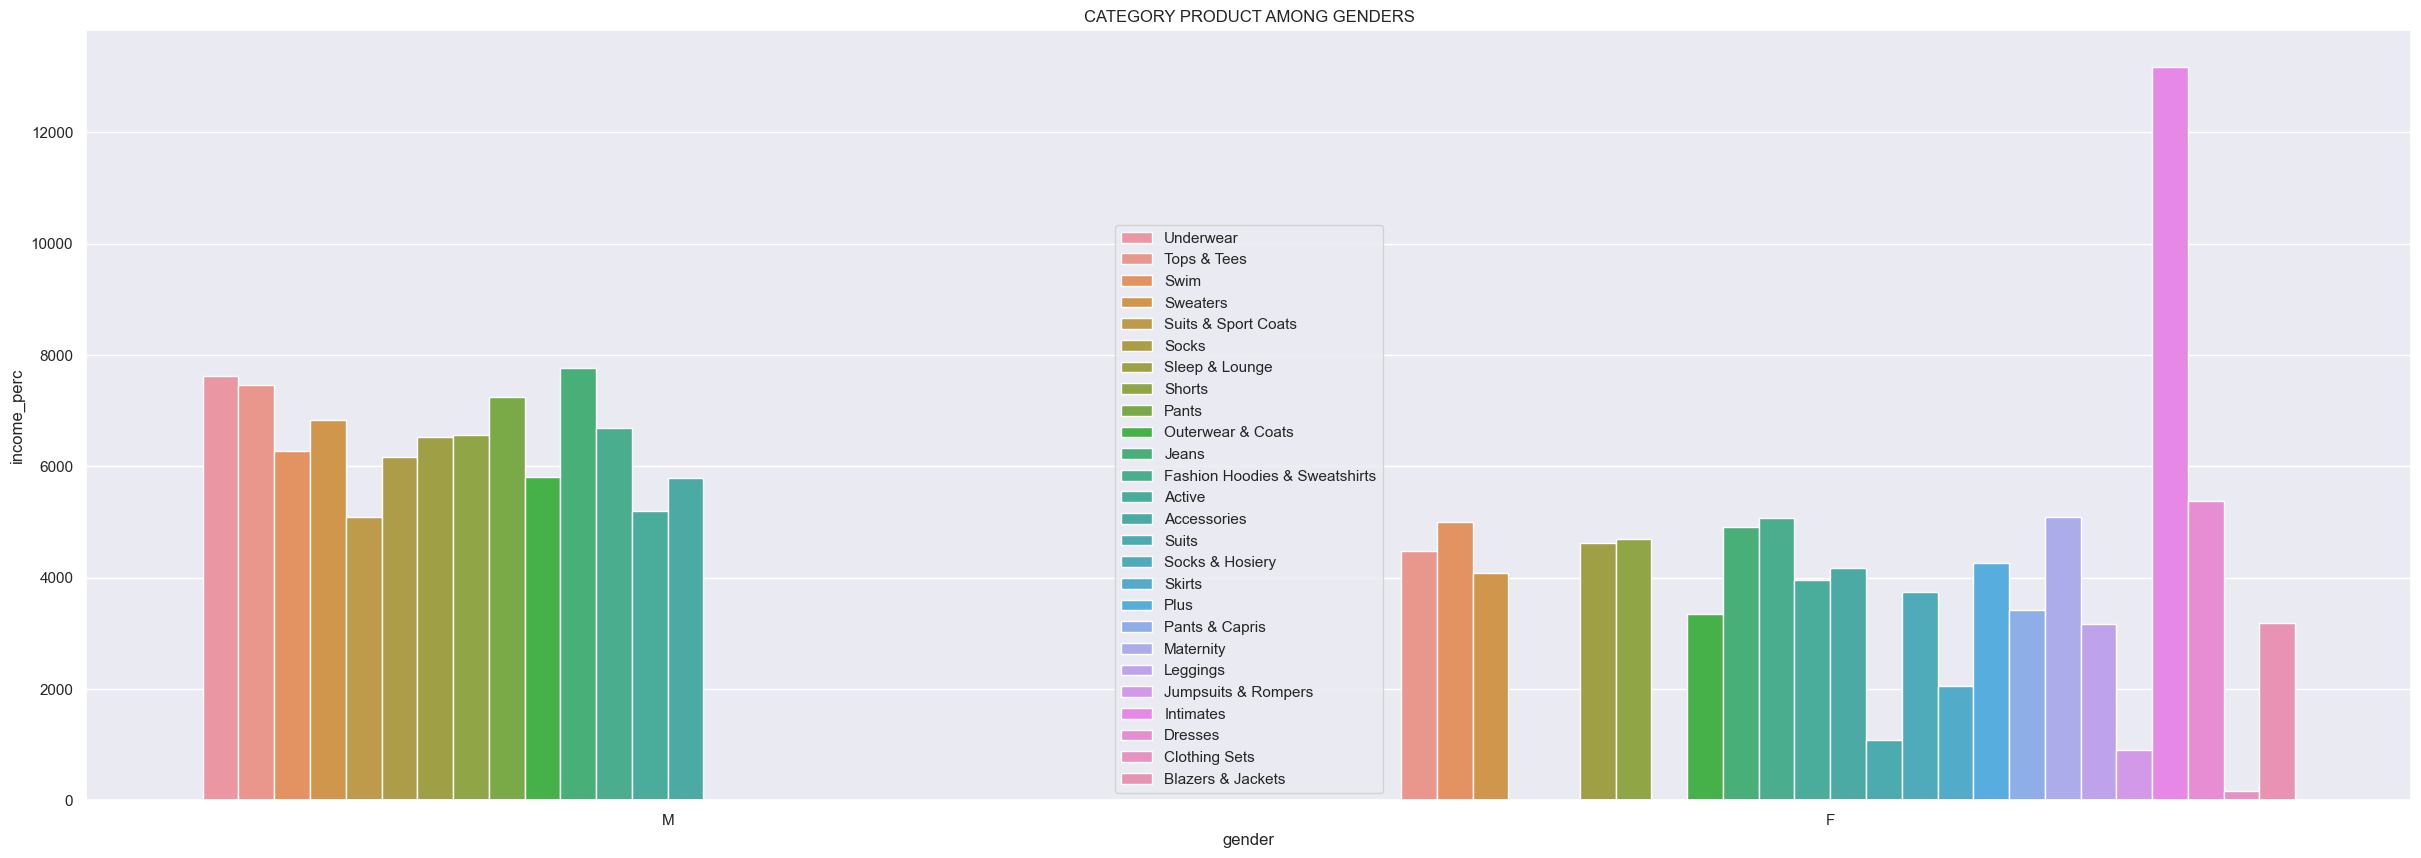

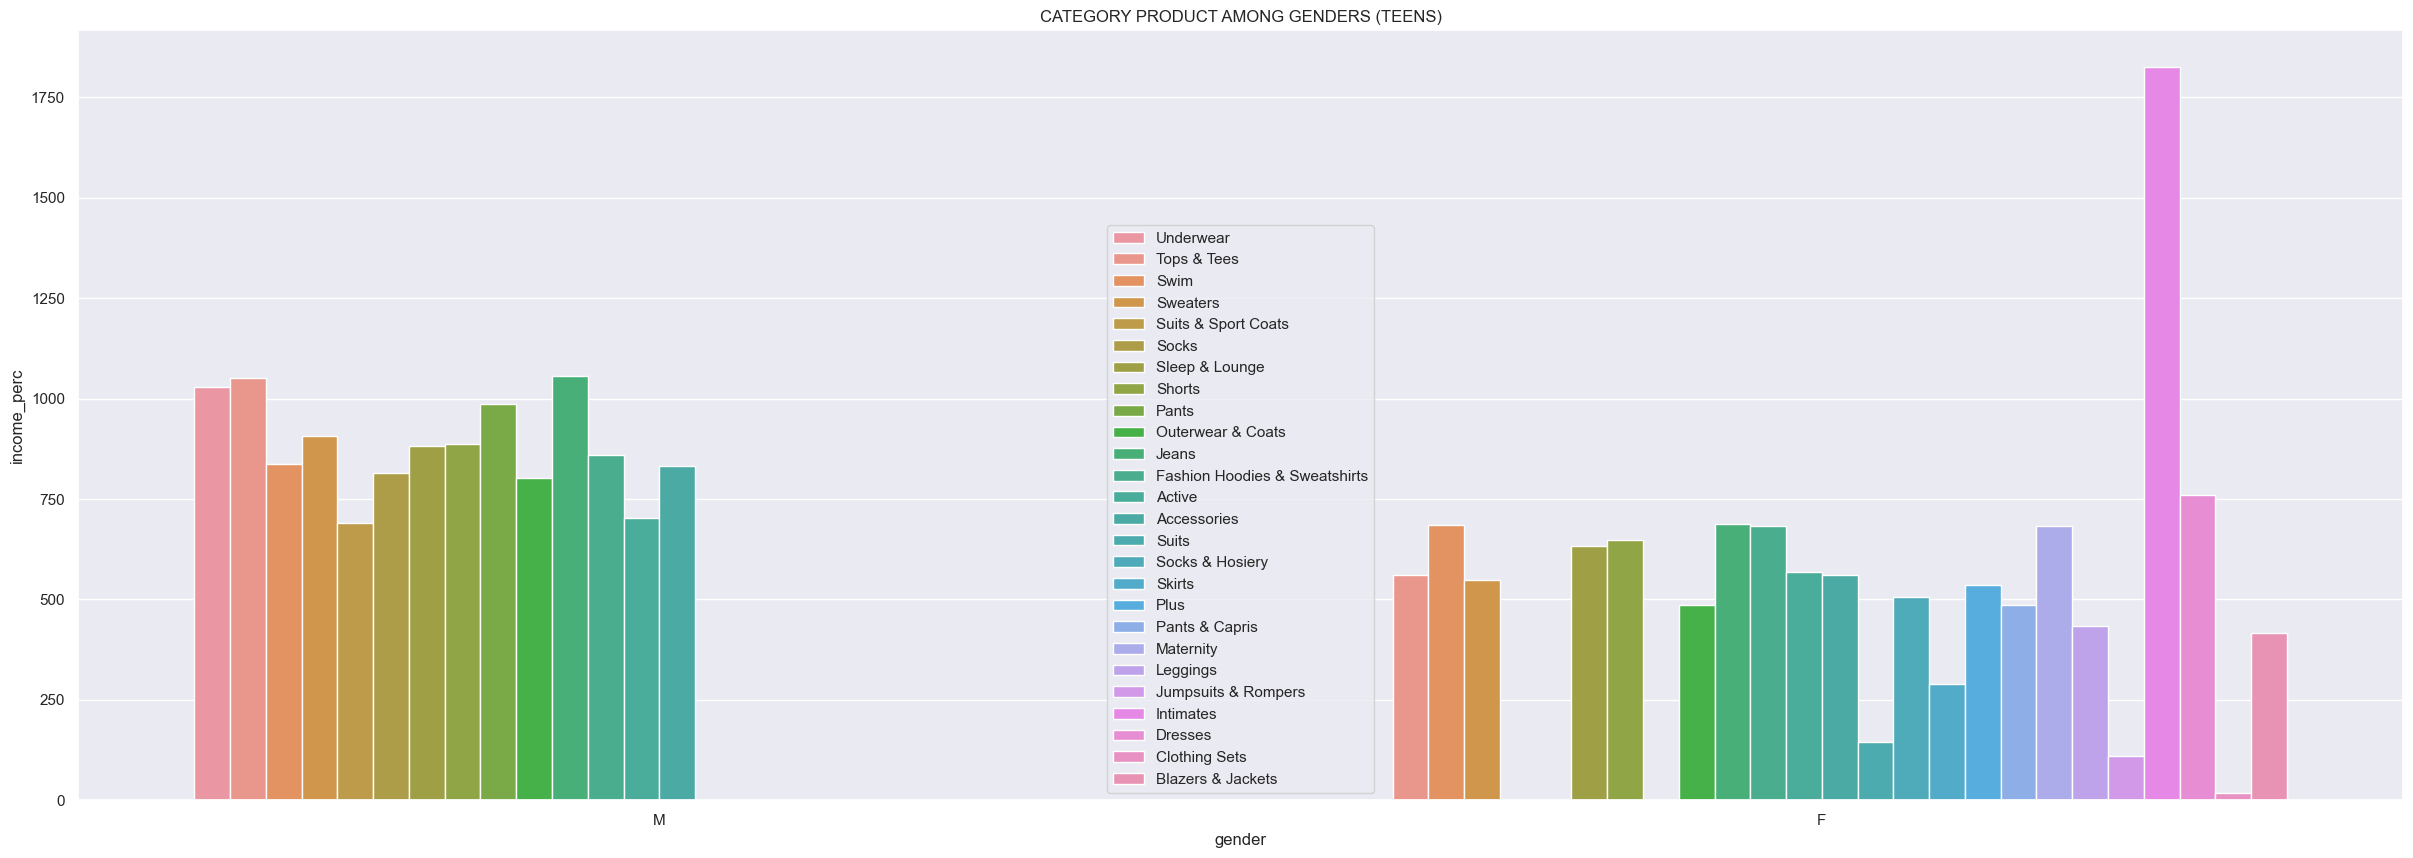

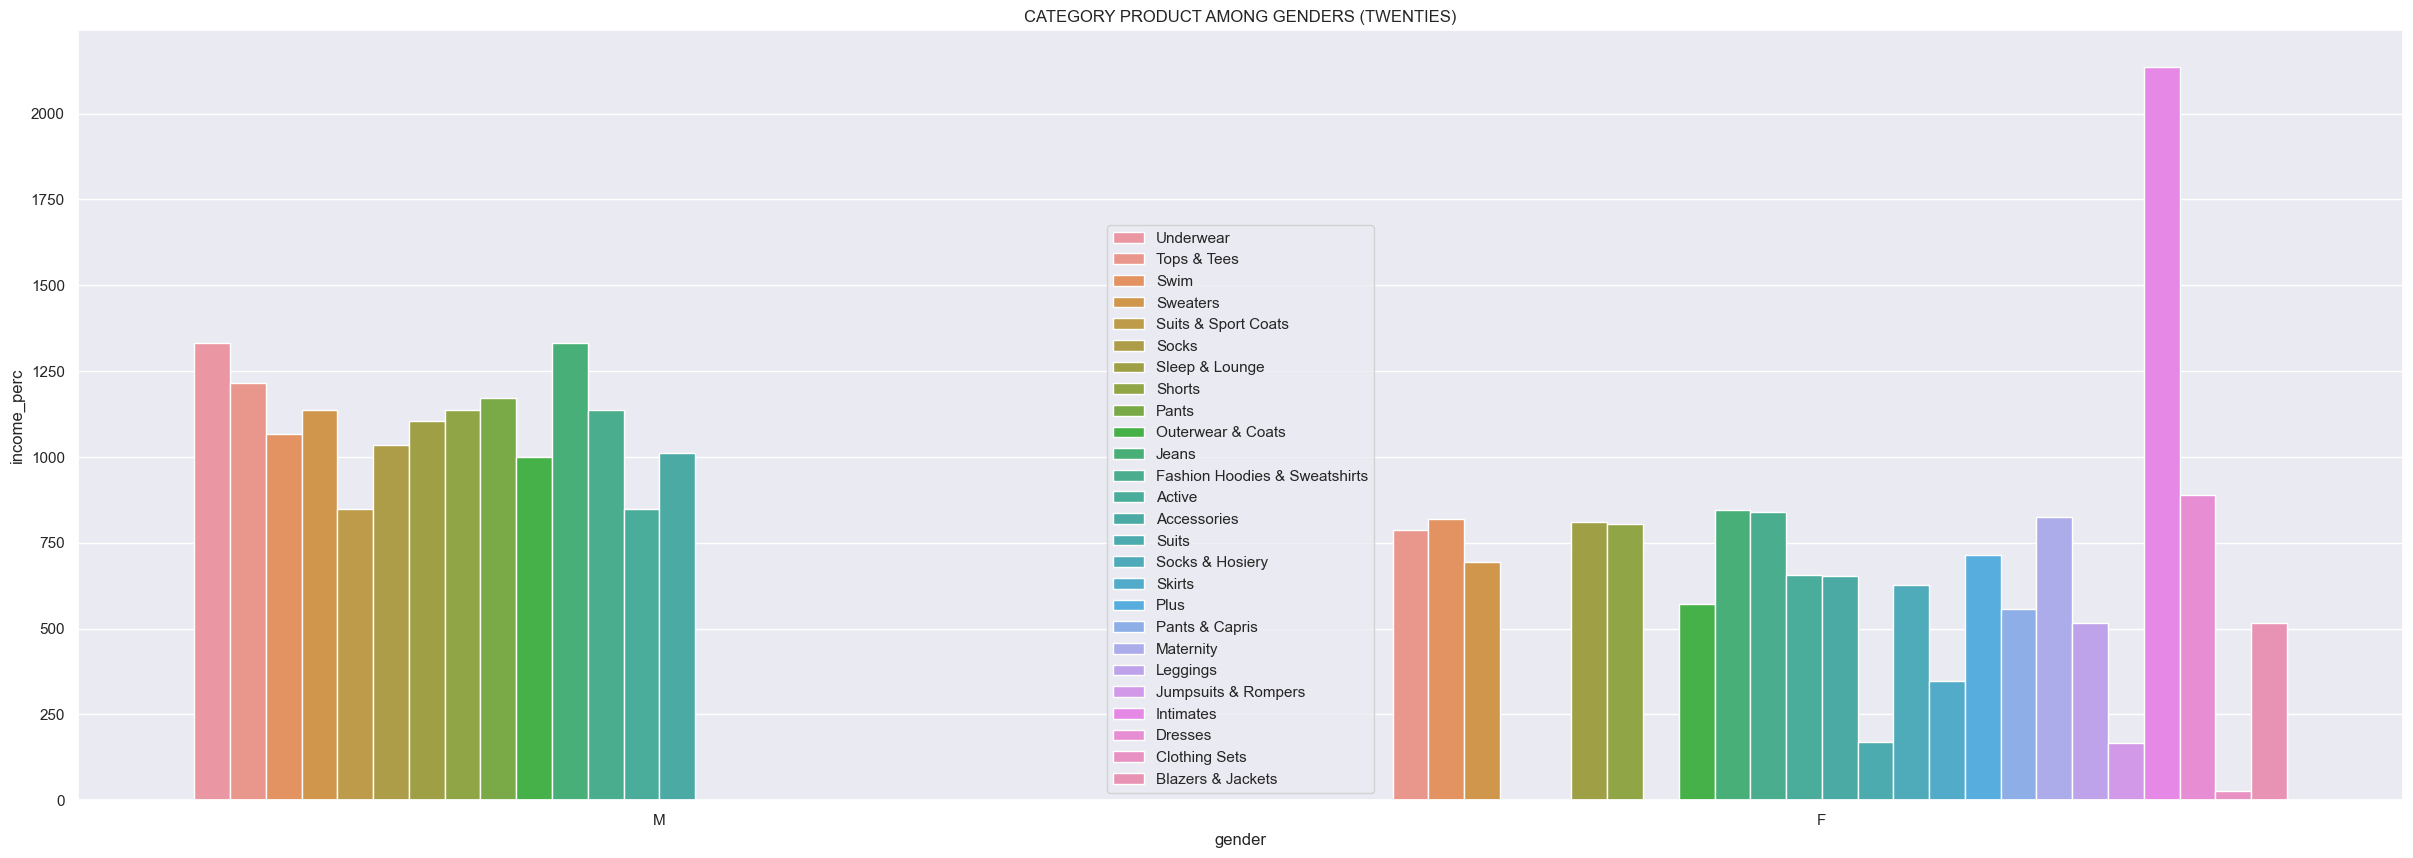

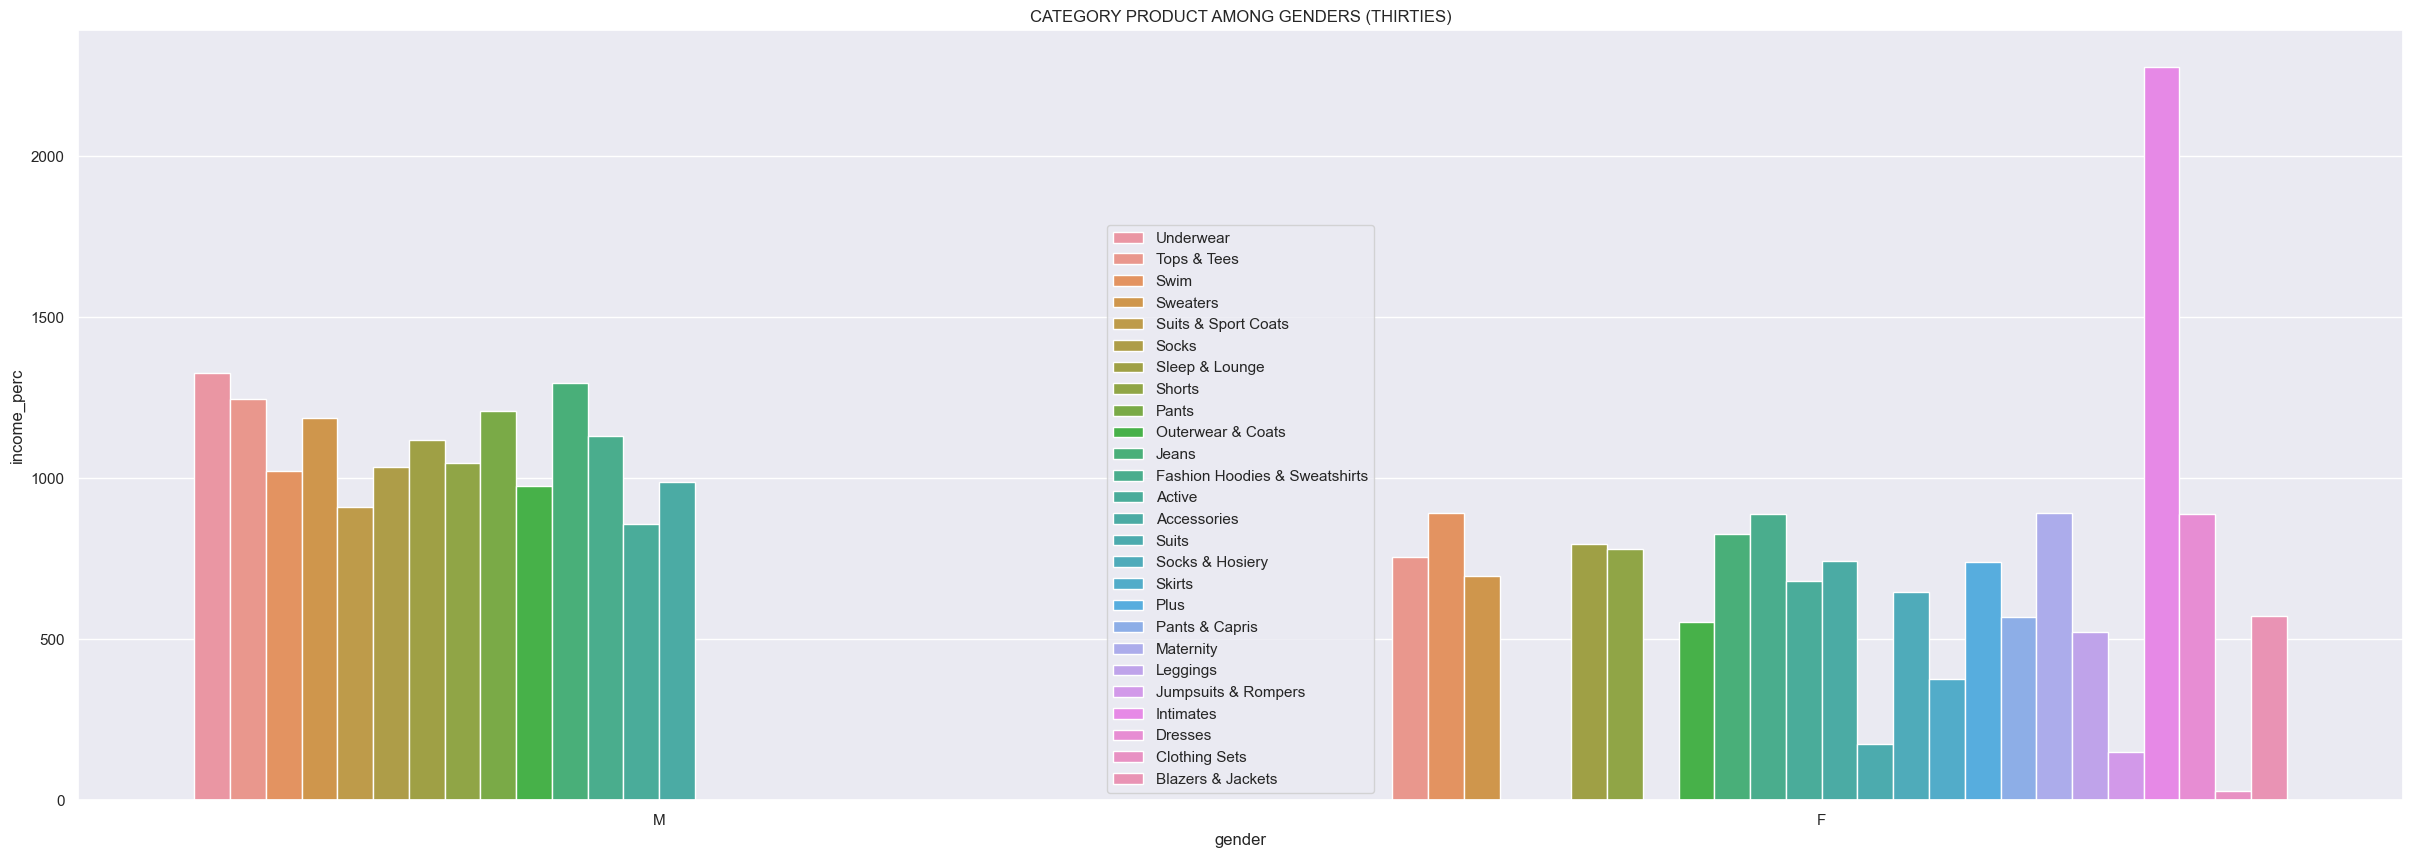

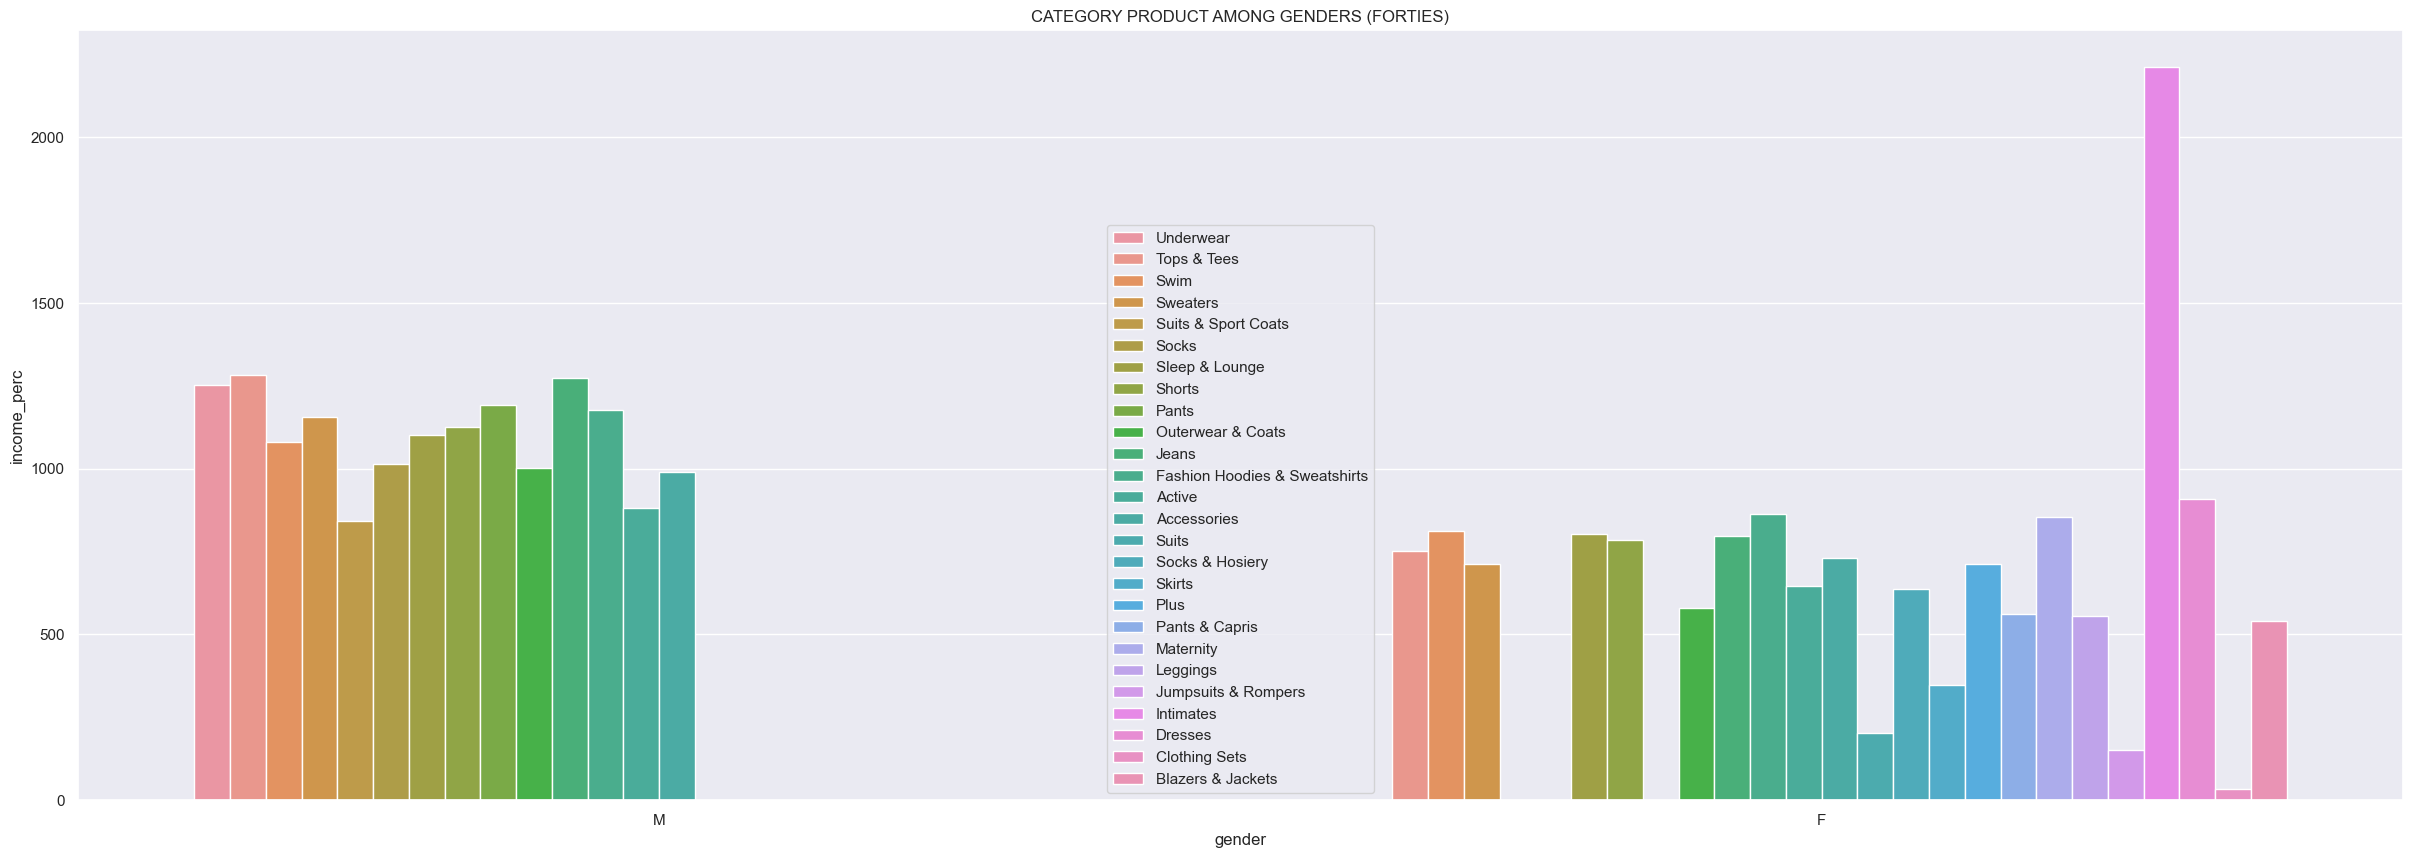

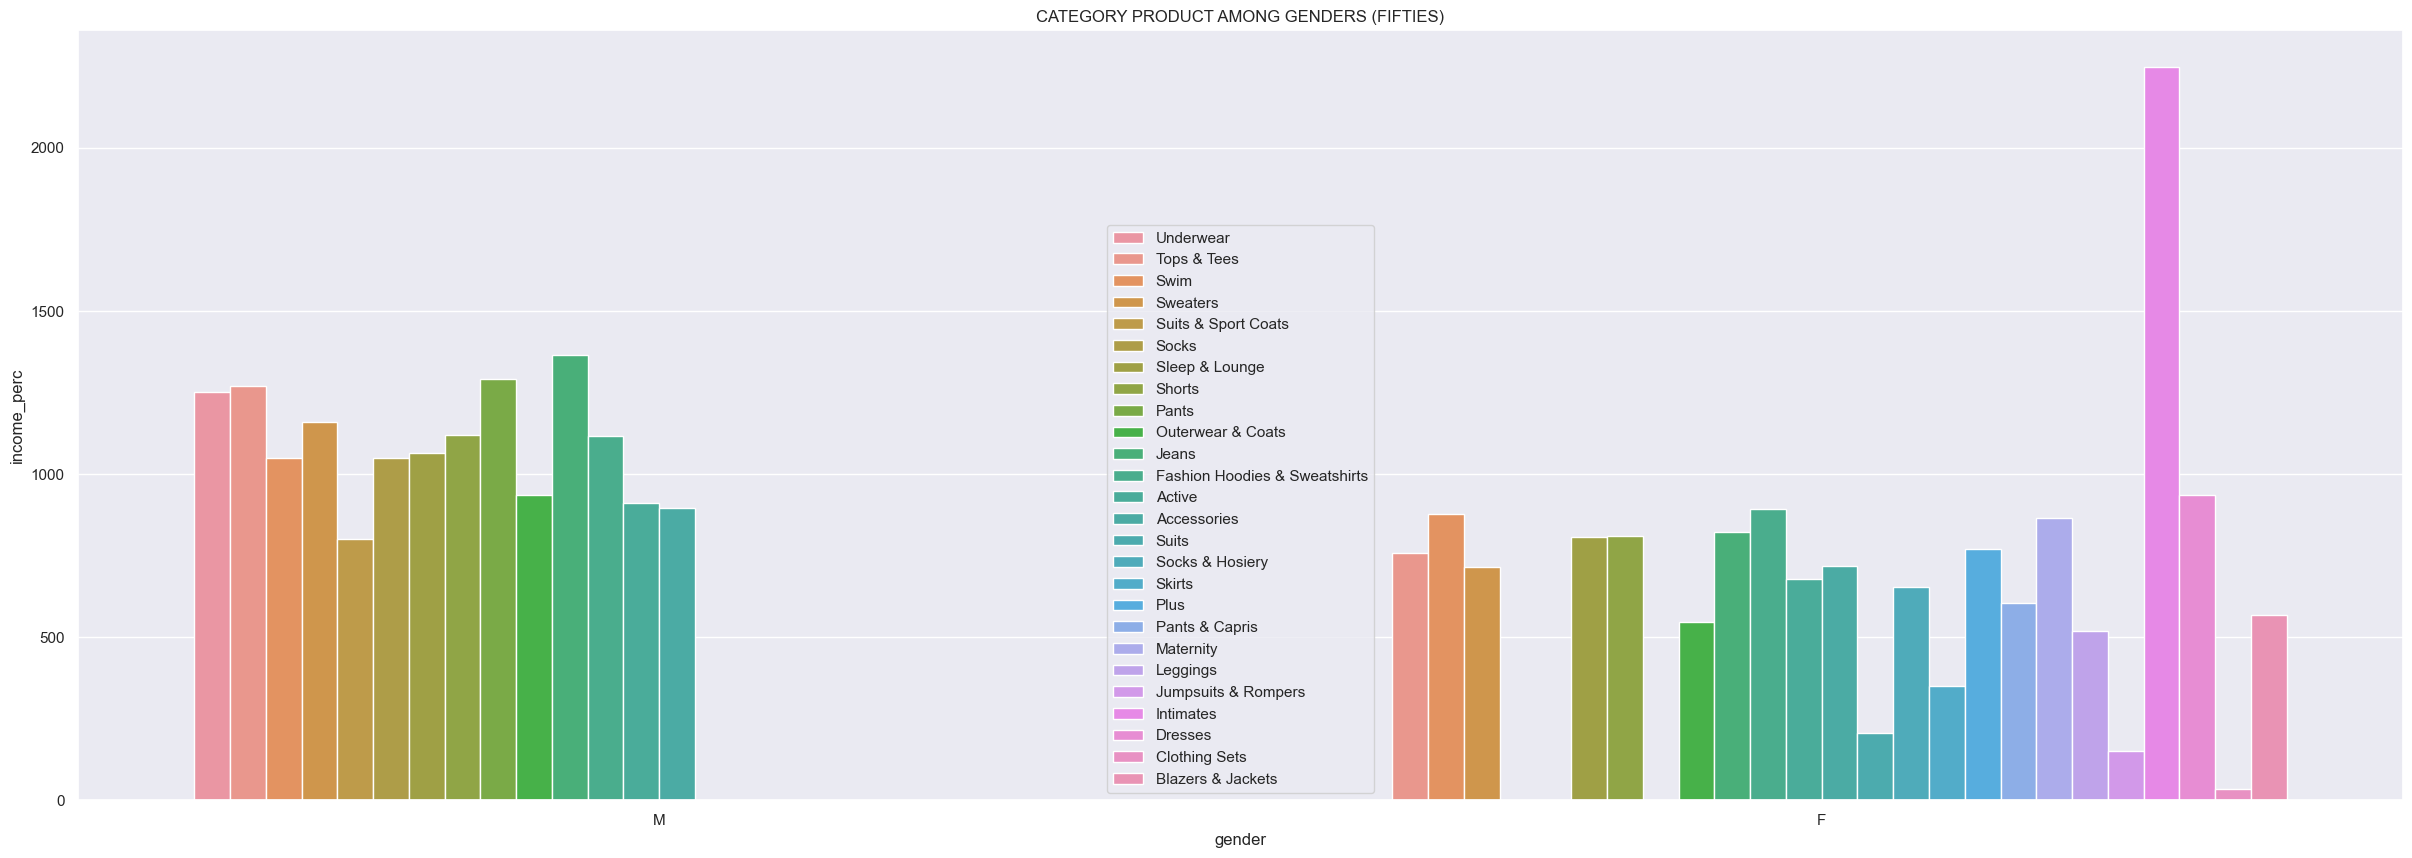

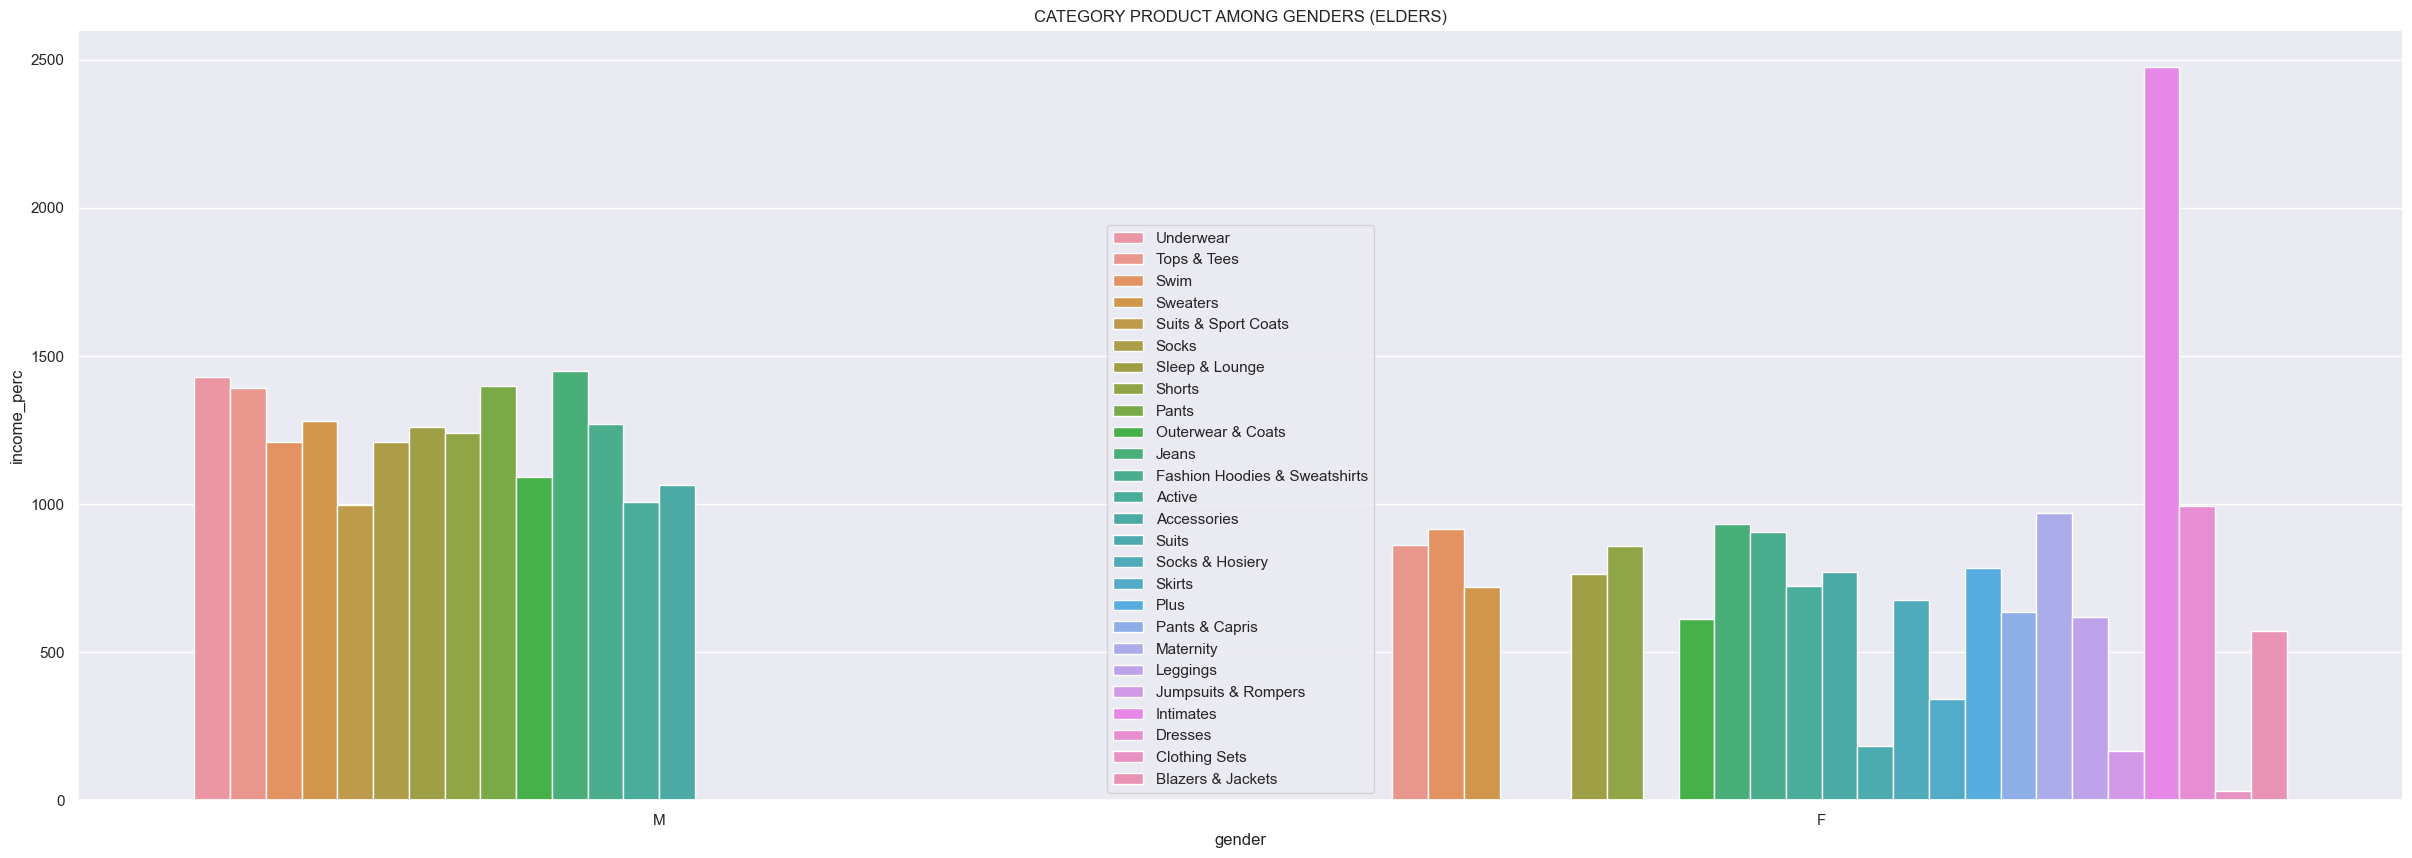

In [256]:
count_7 = 0

products_among_genders_and_age_group = products_users_clean[["gender","age_group","category","income_perc"]].groupby(["gender","age_group","category"],as_index=False).agg({'income_perc': 'count'}).sort_values(["income_perc"], ascending=False)

products_among_genders = products_users_clean[["gender","category","income_perc"]].groupby(["gender","category"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","category"], ascending=False)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders, x="gender", y="income_perc", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS")
plt.legend(loc='lower center')

# COMMENT: here we can easily see a pattern. Men trand to but products on the first 16 categories and women are the only who buy skirts, plus, pants, maternity leggings,... They clearly buy a lot of intimates

# TEENS
products_among_genders_teens = products_users_clean[products_users_clean.age_group=="1-Teens"][["gender","category","income_perc"]].groupby(["gender","category"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","category"], ascending=False)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_teens, x="gender", y="income_perc", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (TEENS)")
plt.legend(loc='lower center')

# TWENTIES
products_among_genders_teens = products_users_clean[products_users_clean.age_group=="2-Twenties"][["gender","category","income_perc"]].groupby(["gender","category"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","category"], ascending=False)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_teens, x="gender", y="income_perc", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (TWENTIES)")
plt.legend(loc='lower center')

# THIRSTIES
products_among_genders_teens = products_users_clean[products_users_clean.age_group=="3-Thirties"][["gender","category","income_perc"]].groupby(["gender","category"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","category"], ascending=False)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_teens, x="gender", y="income_perc", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (THIRTIES)")
plt.legend(loc='lower center')

# FORTIES
products_among_genders_teens = products_users_clean[products_users_clean.age_group=="4-Forties"][["gender","category","income_perc"]].groupby(["gender","category"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","category"], ascending=False)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_teens, x="gender", y="income_perc", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (FORTIES)")
plt.legend(loc='lower center')

# FIFTIES
products_among_genders_teens = products_users_clean[products_users_clean.age_group=="5-Fifties"][["gender","category","income_perc"]].groupby(["gender","category"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","category"], ascending=False)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_teens, x="gender", y="income_perc", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (FIFTIES)")
plt.legend(loc='lower center')

# ELDERS
products_among_genders_teens = products_users_clean[products_users_clean.age_group=="6-Elders"][["gender","category","income_perc"]].groupby(["gender","category"],as_index=False).agg({'income_perc': 'count'}).sort_values(["gender","category"], ascending=False)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_teens, x="gender", y="income_perc", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (ELDERS)")
plt.legend(loc='lower center')